# Visualizations

In [ ]:
!pip uninstall scikit-learn -y --quiet
!pip install -U scikit-learn --quiet
!pip install ecco --quiet
!pip install transformers --quiet
!pip install datasets --quiet
!pip install evaluate --quiet
!pip install sentencepiece --quiet
!pip install accelerate --quiet
!pip install bertviz --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 26.0 MB/s eta 0:00:00
   

### Histograms

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

#### Worst 200 comparison between contrastive and beam

In [ ]:
#Load in files

mt5_beam_worst_df = pd.read_excel(f'/content/drive/MyDrive/MscThesis/Post_manual_eval/Round 2/Updated/Beam_mt5_worst_200_1_generations.xlsx')
t5_beam_worst_df = pd.read_excel(f'/content/drive/MyDrive/MscThesis/Post_manual_eval/Round 2/Updated/Beam_t5_dutch_worst_200_1_generations.xlsx')

mt5_contrastive_worst_df = pd.read_excel(f'/content/drive/MyDrive/MscThesis/Post_manual_eval/Round 2/Updated/Contrastive_mt5_dutch_worst_200s.xlsx')
t5_contrastive_worst_df = pd.read_excel(f'/content/drive/MyDrive/MscThesis/Post_manual_eval/Round 2/Updated/Contrastive_t5_dutch_worst_200.xlsx')


In [ ]:
# create totals for easy barplots

mt5_beam_sums = mt5_beam_worst_df.select_dtypes(pd.np.number).sum().rename('total')
t5_beam_sums = t5_beam_worst_df.select_dtypes(pd.np.number).sum().rename('total')
mt5_contrastive_sums = mt5_contrastive_worst_df.select_dtypes(pd.np.number).sum().rename('total')
t5_contrastive_sums = t5_contrastive_worst_df.select_dtypes(pd.np.number).sum().rename('total')

# append sums to the data frame
mt5_beam_worst_df = mt5_beam_worst_df.append(mt5_beam_sums)
t5_beam_worst_df = t5_beam_worst_df.append(t5_beam_sums)
mt5_contrastive_worst_df = mt5_contrastive_worst_df.append(mt5_contrastive_sums)
t5_contrastive_worst_df = t5_contrastive_worst_df.append(t5_contrastive_sums)


mt5_beam_worst_df= mt5_beam_worst_df.replace(np.nan, '')
t5_beam_worst_df = t5_beam_worst_df.replace(np.nan, '')
mt5_contrastive_worst_df = mt5_contrastive_worst_df.replace(np.nan, '')
t5_contrastive_worst_df = t5_contrastive_worst_df.replace(np.nan, '')




<ipython-input-3-598d0ac67673>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  mt5_beam_sums = mt5_beam_worst_df.select_dtypes(pd.np.number).sum().rename('total')
<ipython-input-3-598d0ac67673>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  t5_beam_sums = t5_beam_worst_df.select_dtypes(pd.np.number).sum().rename('total')
<ipython-input-3-598d0ac67673>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  mt5_contrastive_sums = mt5_contrastive_worst_df.select_dtypes(pd.np.number).sum().rename('total')
<ipython-input-3-598d0ac67673>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  t5_contrastive_sums = t5_contrastive_worst_df.select_dtypes(

Text(0, 0.5, 'Total number')

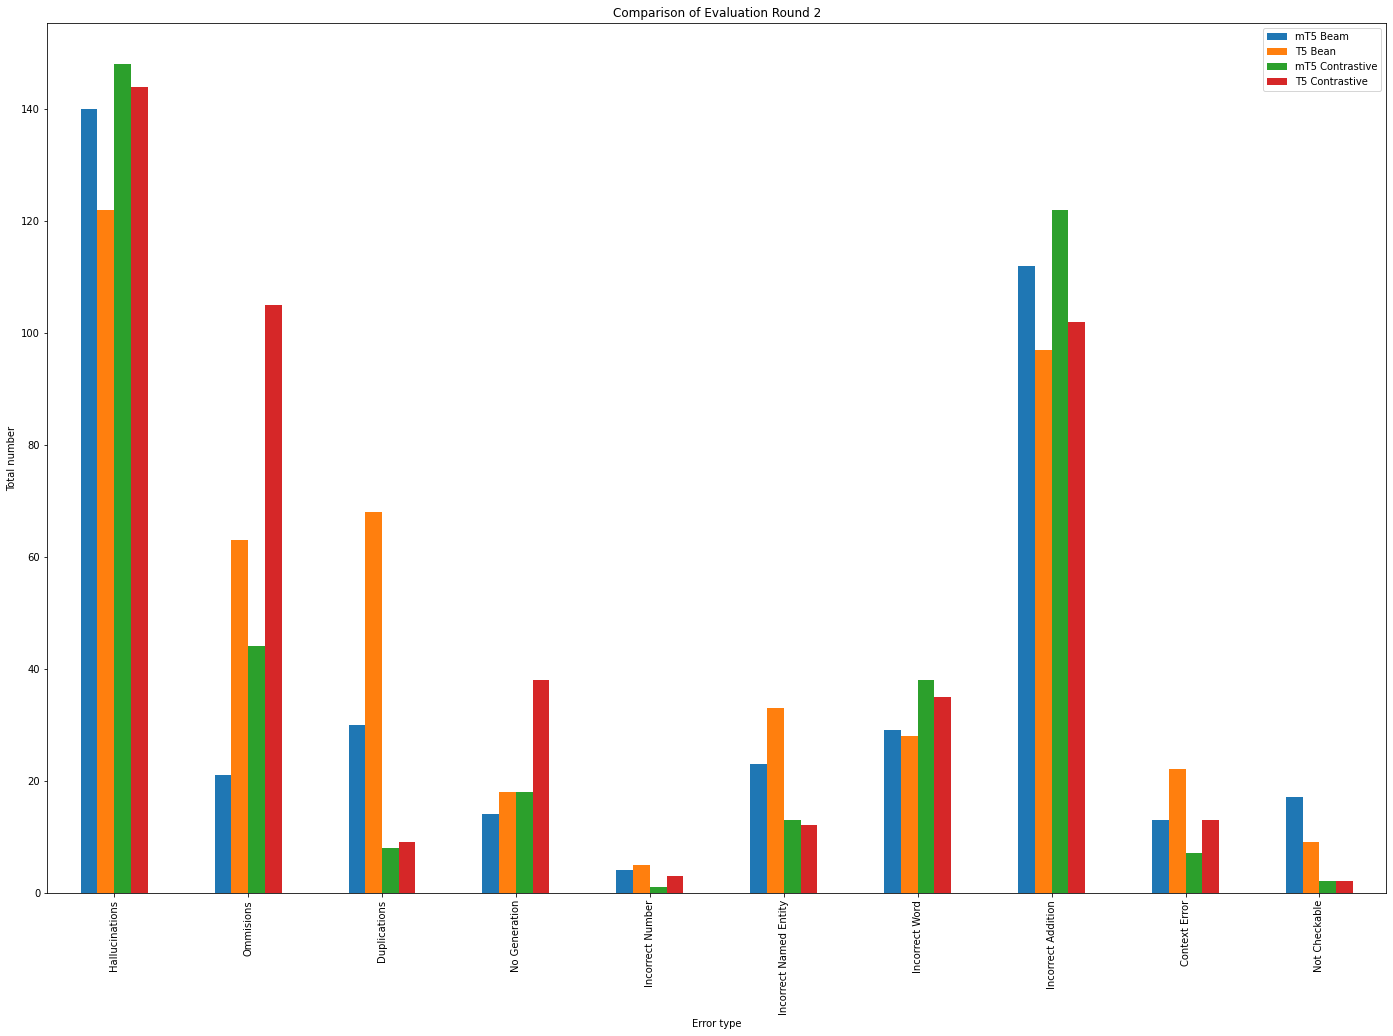

In [ ]:
plotdata = pd.DataFrame({
    "mT5 Beam":[mt5_beam_worst_df.loc['total']['Hallucinations'], mt5_beam_worst_df.loc['total']['Ommisions'], mt5_beam_worst_df.loc['total']['Duplications'], mt5_beam_worst_df.loc['total']['No Generation'], mt5_beam_worst_df.loc['total']['Incorrect Number'],
                mt5_beam_worst_df.loc['total']['Incorrect Named Entity'],mt5_beam_worst_df.loc['total']['Incorrect Word'],mt5_beam_worst_df.loc['total']['Incorrect Addition'],mt5_beam_worst_df.loc['total']['Context Error'],mt5_beam_worst_df.loc['total']['Not Checkable']],

    "T5 Bean":[t5_beam_worst_df.loc['total']['Hallucinations'], t5_beam_worst_df.loc['total']['Ommisions'], t5_beam_worst_df.loc['total']['Duplications'], t5_beam_worst_df.loc['total']['No Generation'], t5_beam_worst_df.loc['total']['Incorrect Number'],
                t5_beam_worst_df.loc['total']['Incorrect Named Entity'],t5_beam_worst_df.loc['total']['Incorrect Word'],t5_beam_worst_df.loc['total']['Incorrect Addition'],t5_beam_worst_df.loc['total']['Context Error'],t5_beam_worst_df.loc['total']['Not Checkable']],

    "mT5 Contrastive":[mt5_contrastive_worst_df.loc['total']['Hallucinations'], mt5_contrastive_worst_df.loc['total']['Ommisions'], mt5_contrastive_worst_df.loc['total']['Duplications'], mt5_contrastive_worst_df.loc['total']['No Generation'], mt5_contrastive_worst_df.loc['total']['Incorrect Number'],
                mt5_contrastive_worst_df.loc['total']['Incorrect Named Entity'],mt5_contrastive_worst_df.loc['total']['Incorrect Word'],mt5_contrastive_worst_df.loc['total']['Incorrect Addition'],mt5_contrastive_worst_df.loc['total']['Context Error'],mt5_contrastive_worst_df.loc['total']['Not Checkable']],

    "T5 Contrastive":[t5_contrastive_worst_df.loc['total']['Hallucinations'], t5_contrastive_worst_df.loc['total']['Ommisions'], t5_contrastive_worst_df.loc['total']['Duplications'], t5_contrastive_worst_df.loc['total']['No Generation'], t5_contrastive_worst_df.loc['total']['Incorrect Number'],
                t5_contrastive_worst_df.loc['total']['Incorrect Named Entity'],t5_contrastive_worst_df.loc['total']['Incorrect Word'],t5_contrastive_worst_df.loc['total']['Incorrect Addition'],t5_contrastive_worst_df.loc['total']['Context Error'],t5_contrastive_worst_df.loc['total']['Not Checkable']]
    }, 
    index=["Hallucinations", "Ommisions", "Duplications", "No Generation", "Incorrect Number", "Incorrect Named Entity", "Incorrect Word", "Incorrect Addition", "Context Error", "Not Checkable"]
)
plotdata.plot(kind="bar", figsize=(24,16))
plt.title("Comparison of Evaluation Round 2")
plt.xlabel("Error type")
plt.ylabel("Total number")

Text(0.5, 0, 'Total number')

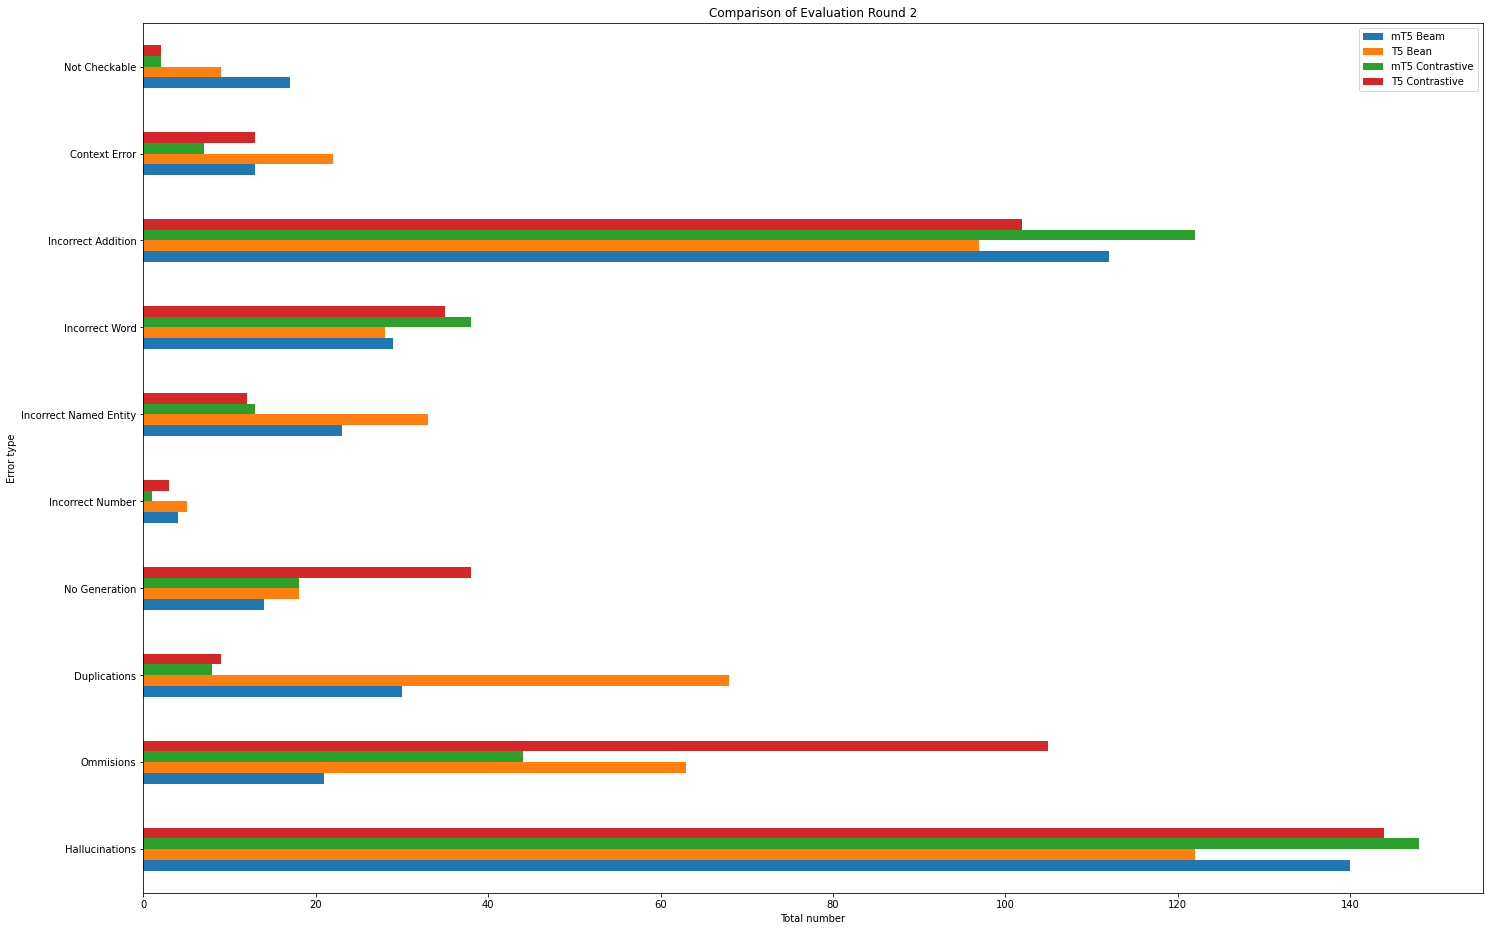

In [ ]:
plotdata = pd.DataFrame({
    "mT5 Beam":[mt5_beam_worst_df.loc['total']['Hallucinations'], mt5_beam_worst_df.loc['total']['Ommisions'], mt5_beam_worst_df.loc['total']['Duplications'], mt5_beam_worst_df.loc['total']['No Generation'], mt5_beam_worst_df.loc['total']['Incorrect Number'],
                mt5_beam_worst_df.loc['total']['Incorrect Named Entity'],mt5_beam_worst_df.loc['total']['Incorrect Word'],mt5_beam_worst_df.loc['total']['Incorrect Addition'],mt5_beam_worst_df.loc['total']['Context Error'],mt5_beam_worst_df.loc['total']['Not Checkable']],

    "T5 Bean":[t5_beam_worst_df.loc['total']['Hallucinations'], t5_beam_worst_df.loc['total']['Ommisions'], t5_beam_worst_df.loc['total']['Duplications'], t5_beam_worst_df.loc['total']['No Generation'], t5_beam_worst_df.loc['total']['Incorrect Number'],
                t5_beam_worst_df.loc['total']['Incorrect Named Entity'],t5_beam_worst_df.loc['total']['Incorrect Word'],t5_beam_worst_df.loc['total']['Incorrect Addition'],t5_beam_worst_df.loc['total']['Context Error'],t5_beam_worst_df.loc['total']['Not Checkable']],

    "mT5 Contrastive":[mt5_contrastive_worst_df.loc['total']['Hallucinations'], mt5_contrastive_worst_df.loc['total']['Ommisions'], mt5_contrastive_worst_df.loc['total']['Duplications'], mt5_contrastive_worst_df.loc['total']['No Generation'], mt5_contrastive_worst_df.loc['total']['Incorrect Number'],
                mt5_contrastive_worst_df.loc['total']['Incorrect Named Entity'],mt5_contrastive_worst_df.loc['total']['Incorrect Word'],mt5_contrastive_worst_df.loc['total']['Incorrect Addition'],mt5_contrastive_worst_df.loc['total']['Context Error'],mt5_contrastive_worst_df.loc['total']['Not Checkable']],

    "T5 Contrastive":[t5_contrastive_worst_df.loc['total']['Hallucinations'], t5_contrastive_worst_df.loc['total']['Ommisions'], t5_contrastive_worst_df.loc['total']['Duplications'], t5_contrastive_worst_df.loc['total']['No Generation'], t5_contrastive_worst_df.loc['total']['Incorrect Number'],
                t5_contrastive_worst_df.loc['total']['Incorrect Named Entity'],t5_contrastive_worst_df.loc['total']['Incorrect Word'],t5_contrastive_worst_df.loc['total']['Incorrect Addition'],t5_contrastive_worst_df.loc['total']['Context Error'],t5_contrastive_worst_df.loc['total']['Not Checkable']]
    }, 
    index=["Hallucinations", "Ommisions", "Duplications", "No Generation", "Incorrect Number", "Incorrect Named Entity", "Incorrect Word", "Incorrect Addition", "Context Error", "Not Checkable"]
)
plotdata.plot(kind="barh", figsize=(24,16))
plt.title("Comparison of Evaluation Round 2")
plt.ylabel("Error type")
plt.xlabel("Total number")

#### Distribution of Bartscores

In [ ]:
file = open('/content/drive/MyDrive/MscThesis/Generation_docs/pickles/T5d_contrastive.pickle', 'rb')
t5_contrastive_df = pickle.load(file)
file.close()


file = open('/content/drive/MyDrive/MscThesis/Generation_docs/pickles/mT5_contrastive.pickle', 'rb')
mt5_contrastive_df = pickle.load(file)
file.close()

file = open('/content/drive/MyDrive/MscThesis/Generation_docs/pickles/T5d_all_beamSearch_one_generations.pickle', 'rb')
dutch_df = pickle.load(file)
file.close()

file = open('/content/drive/MyDrive/MscThesis/Generation_docs/pickles/mT5_all_beamSearch_one_generations.pickle', 'rb')
mt5_df = pickle.load(file)
file.close()


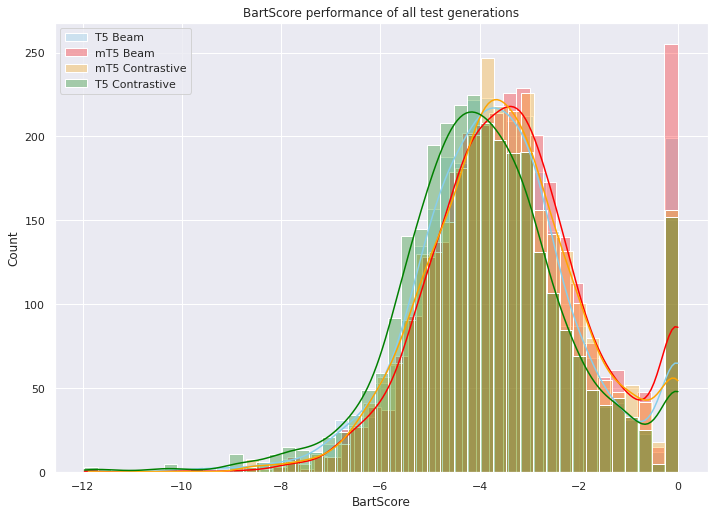

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.histplot(data=dutch_df["BartScore"], color="skyblue", label="T5 Beam", kde=True, alpha=0.3)
sns.histplot(data=mt5_df["BartScore"], color="red", label="mT5 Beam", kde=True, alpha=0.3)
sns.histplot(data=mt5_contrastive_df["BartScore"], color="orange", label="mT5 Contrastive", kde=True, alpha=0.3)
sns.histplot(data=t5_contrastive_df["BartScore"], color="green", label="T5 Contrastive", kde=True, alpha=0.3)

plt.legend()
plt.title("BartScore performance of all test generations") 
plt.show()

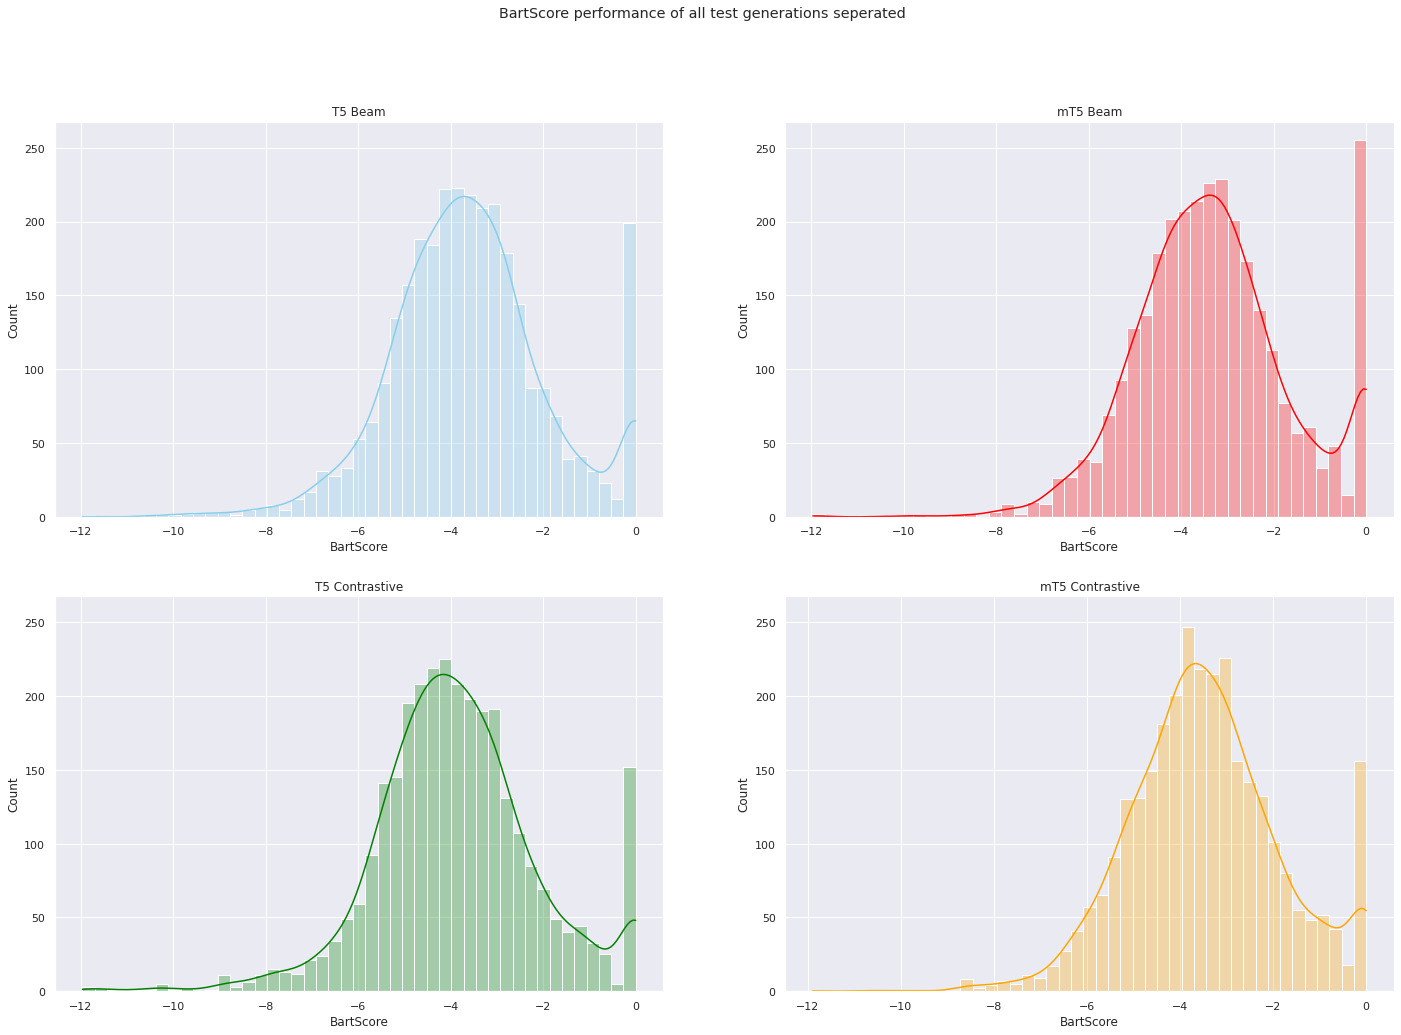

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(24, 16))

sns.histplot(data=dutch_df["BartScore"], color="skyblue",  label="T5 Beam", kde=True, alpha=0.3, ax=axs[0, 0]).set_title('T5 Beam')
sns.histplot(data=mt5_df["BartScore"], color="red", label="mT5 Beam", kde=True, alpha=0.3, ax=axs[0, 1]).set_title('mT5 Beam')
sns.histplot(data=t5_contrastive_df["BartScore"], color="green", label="T5 Contrastive", kde=True, alpha=0.3, ax=axs[1, 0]).set_title('T5 Contrastive')
sns.histplot(data=mt5_contrastive_df["BartScore"], color="orange", label="mT5 Contrastive", kde=True, alpha=0.3, ax=axs[1, 1]).set_title('mT5 Contrastive')

plt.setp(axs, ylim=axs[0,1].get_ylim())

plt.suptitle('BartScore performance of all test generations seperated')
plt.show()

In [ ]:
def get_RDF_count(dataframe):
  dataframe['RDF'] = dataframe['RDF'].apply(lambda x: literal_eval(x) if len(x) > 0 else "")
  dataframe['RDF_Count'] = dataframe['RDF'].apply(lambda x: len(x))
  return dataframe

In [ ]:
dutch_df = get_RDF_count(dutch_df)
mt5_df = get_RDF_count(mt5_df)
t5_contrastive_df = get_RDF_count(t5_contrastive_df)
mt5_contrastive_df = get_RDF_count(mt5_contrastive_df)

All data

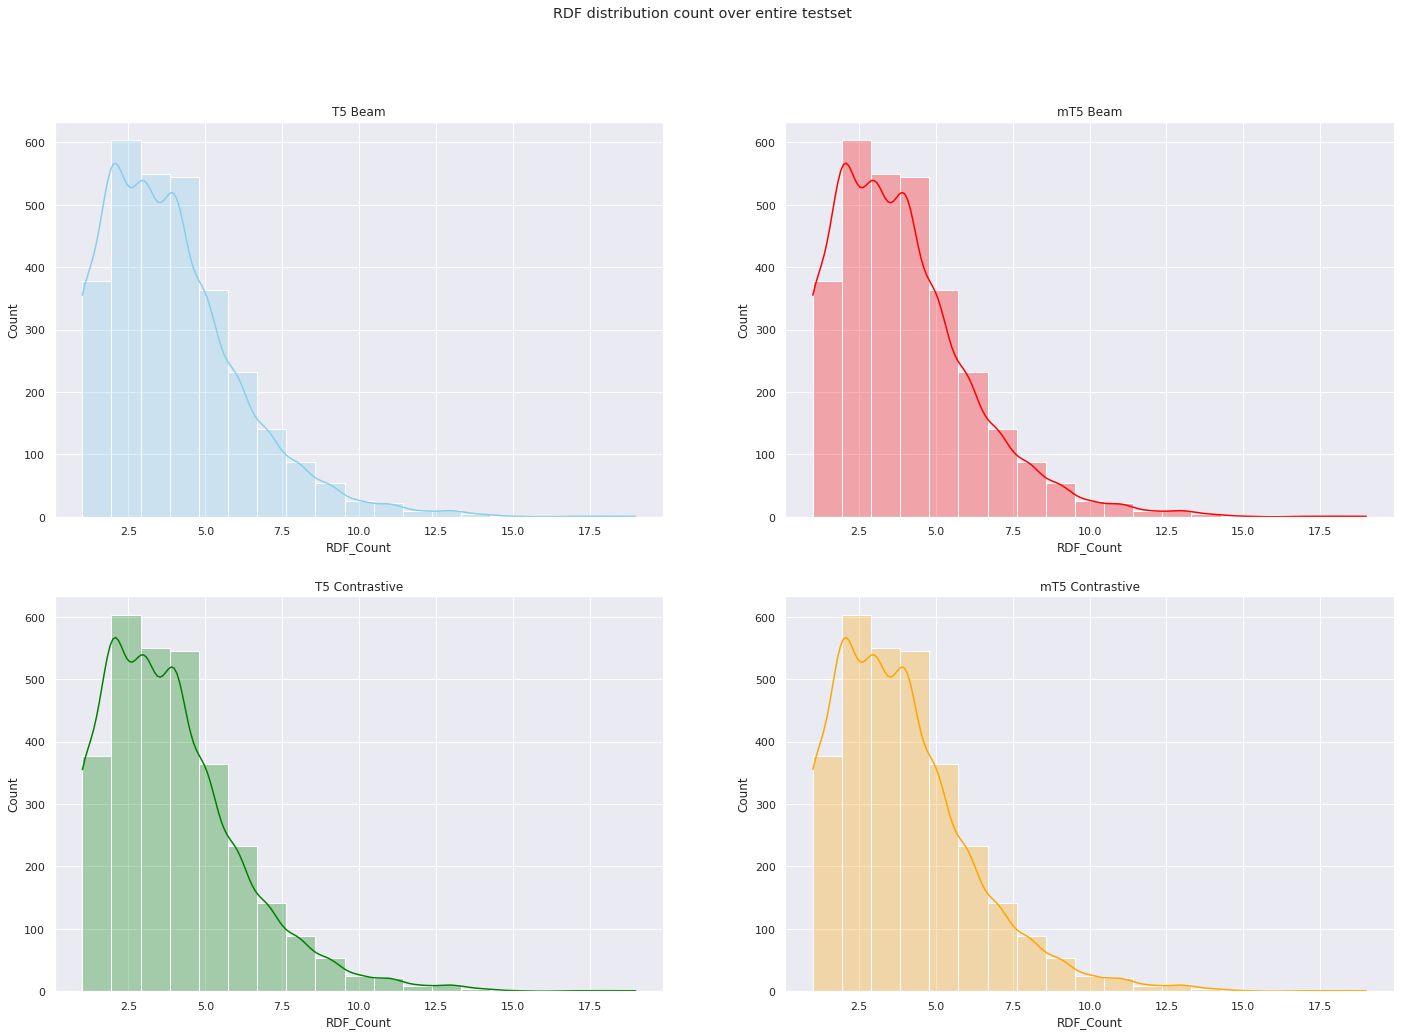

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(24, 16))

sns.histplot(data=dutch_df["RDF_Count"], color="skyblue", bins=19,  label="T5 Beam", kde=True, alpha=0.3, ax=axs[0, 0]).set_title('T5 Beam')
sns.histplot(data=mt5_df["RDF_Count"], color="red", bins=19, label="mT5 Beam", kde=True, alpha=0.3, ax=axs[0, 1]).set_title('mT5 Beam')
sns.histplot(data=t5_contrastive_df["RDF_Count"], bins=19, color="green", label="T5 Contrastive", kde=True, alpha=0.3, ax=axs[1, 0]).set_title('T5 Contrastive')
sns.histplot(data=mt5_contrastive_df["RDF_Count"], bins=19, color="orange", label="mT5 Contrastive", kde=True, alpha=0.3, ax=axs[1, 1]).set_title('mT5 Contrastive')

plt.suptitle('RDF distribution count over entire testset')
plt.show()

Worst 200 splits


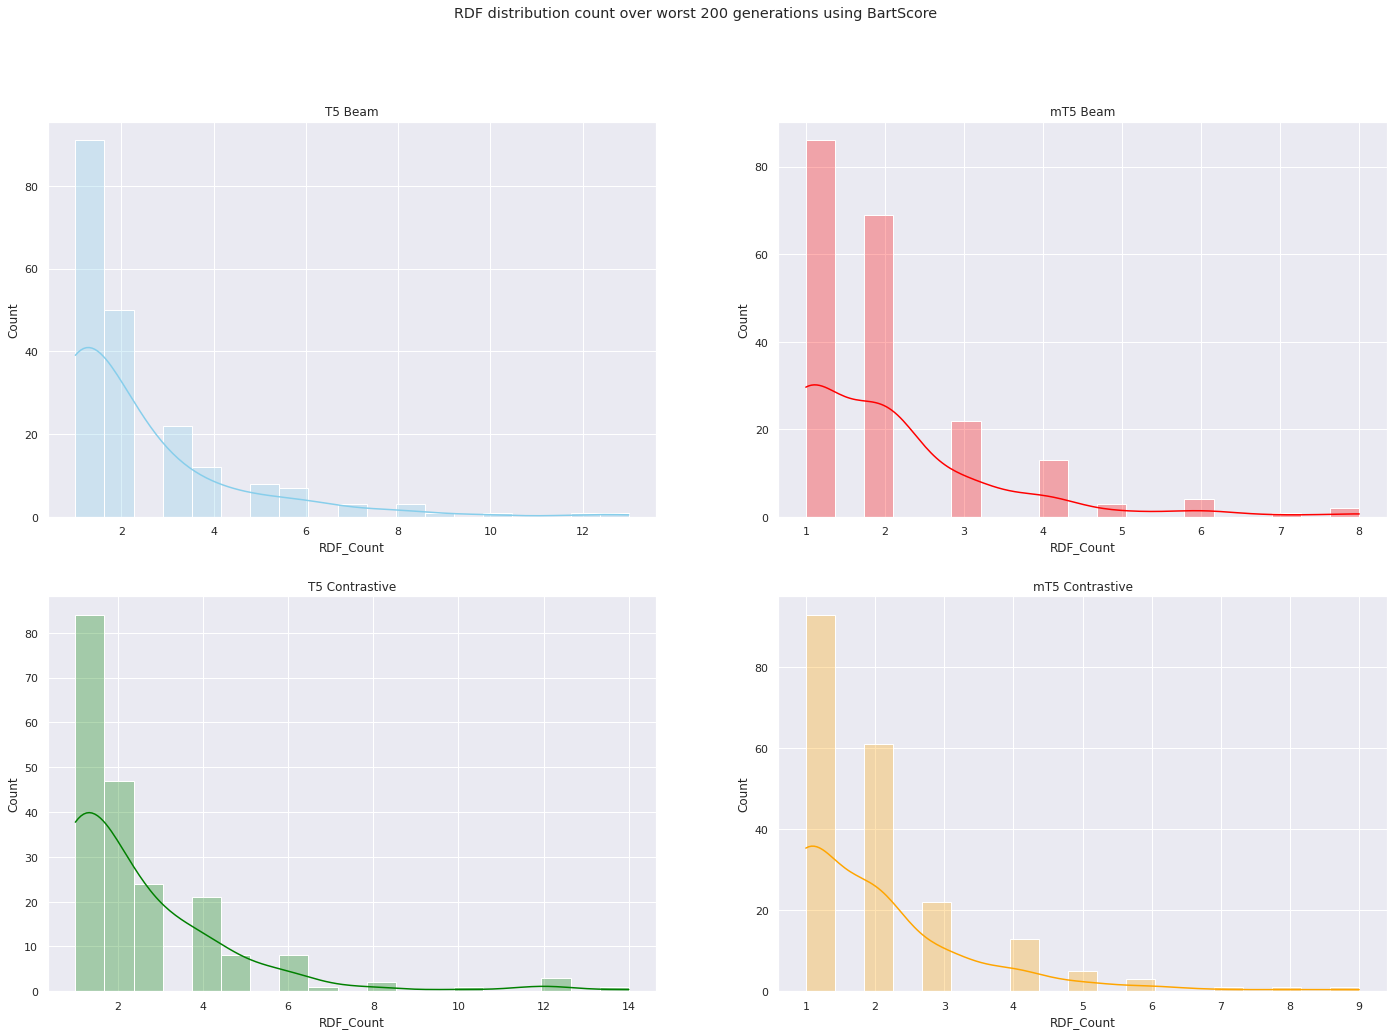

In [ ]:
T5_beam_copy = t5_beam_worst_df.copy(deep=True)
mT5_beam_copy = mt5_beam_worst_df.copy(deep=True)
T5_contrastive_copy = t5_contrastive_worst_df.copy(deep=True)
mT5_contrastive_copy = mt5_contrastive_worst_df.copy(deep=True)

# Get the RDF counts
T5_beam_extended = get_RDF_count(T5_beam_copy)
mT5_beam_extended = get_RDF_count(mT5_beam_copy)
T5_contrastive_extended = get_RDF_count(T5_contrastive_copy)
mT5_contrastive_extended = get_RDF_count(mT5_contrastive_copy)

fig, axs = plt.subplots(2, 2, figsize=(24, 16))

sns.histplot(data=T5_beam_extended["RDF_Count"], color="skyblue", bins=19,  label="T5 Beam", kde=True, alpha=0.3, ax=axs[0, 0]).set_title('T5 Beam')
sns.histplot(data=mT5_beam_extended["RDF_Count"], color="red", bins=19, label="mT5 Beam", kde=True, alpha=0.3, ax=axs[0, 1]).set_title('mT5 Beam')
sns.histplot(data=T5_contrastive_extended["RDF_Count"], bins=19, color="green", label="T5 Contrastive", kde=True, alpha=0.3, ax=axs[1, 0]).set_title('T5 Contrastive')
sns.histplot(data=mT5_contrastive_extended["RDF_Count"], bins=19, color="orange", label="mT5 Contrastive", kde=True, alpha=0.3, ax=axs[1, 1]).set_title('mT5 Contrastive')

plt.suptitle('RDF distribution count over worst 200 generations using BartScore')

plt.show()

In [ ]:
T5_beam_copy

RDF  \
0                           [('locationName, New York')]   
1                                  [('hasWonTeam, ADO')]   
2                        [('locationName, Wall Street')]   
3                                [('locationName, VS.')]   
4                             [('playerName, Guardado')]   
...                                                  ...   
196    [('locationArea, Cascades'), ('temperatureHotC...   
197                          [('halfTimeScore, gelijk')]   
198                             [('locationName, Iran')]   
199                            [('teamName, Utrechtse')]   
total                                                      

                                             Predictions  \
0                                               New York   
1                                                  ADO -   
2                                            Wall Street   
3                                                 De VS.   
4                               Guardado was not amused.   
...                                                  ...   
196    Cascades: Snowy and cold weather is possible a...   
197    De ploegen hielden elkaar in evenwicht en hiel...   
198    In het geval van Iran is er geen sprake van ee...   
199    De Utrechtse ploeg is op weg naar een goed res...   
total                                                      

                                                    Real          BLUE  \
0      New York - De argumenten voor een renteverlagi...  0.000000e+00   
1      ADO boekte daardoor opnieuw een knappe overwin...  0.000000e+00   
2      Een dag na een uiterst beroerde sessie maakt W...  0.000000e+00   
3      Trump zei echter niet bang te zijn voor een la...  0.000000e+00   
4      Weer Guardado mocht het zich aantrekken dat hi...  0.000000e+00   
...                                                  ...           ...   
196    "At this point, it appears doubtful the combin...  5.366840e+16   
197                 Daarmee was ook de ruststand gelijk.  0.000000e+00   
198          Iran noemt de beschuldigingen ongefundeerd.  0.000000e+00   
199    Vanwege de moordende concurrentie op het Utrec...  0.000000e+00   
total                                                     1.237762e+17   

            Rouge 1       Rouge 2        RougeL        Meteor    Perplexity  \
0      1.379310e+16  7.407407e+15  1.379310e+16  6.672598e+15  6.789276e+15   
1      1.428571e+16  0.000000e+00  1.428571e+16  3.906250e+05  5.645878e+15   
2      2.500000e+01  1.428571e+16  2.500000e+01  1.368613e+16  1.948564e+16   
3      1.904762e+15  1.052632e+16  1.904762e+15  1.533565e+16  3.829755e+15   
4      9.523810e+15  0.000000e+00  9.523810e+15  5.988024e+15  2.669692e+13   
...             ...           ...           ...           ...           ...   
196    4.333333e+15  2.758621e+16  3.666667e+16  3.159275e+14  9.307613e+15   
197    1.111111e+15  0.000000e+00  1.111111e+15  1.973684e+16  5.854438e+13   
198    1.176471e+16  0.000000e+00  1.176471e+16  1.492537e+16  7.259031e+15   
199    3.157895e+15  0.000000e+00  2.105263e+15  1.980198e+16  3.914173e+15   
total  2.394328e+18  1.278672e+18  2.413203e+18  2.795165e+18  1.994311e+18   

       Bert_precision  ...  Incorrect Number  Incorrect Named Entity  \
0        9.178623e+15  ...               0.0                     0.0   
1        8.586638e+13  ...               0.0                     0.0   
2        9.160118e+15  ...               0.0                     0.0   
3        8.953006e+15  ...               0.0                     0.0   
4        8.959678e+15  ...               0.0                     0.0   
...               ...  ...               ...                     ...   
196      9.420643e+15  ...               0.0                     0.0   
197      8.186609e+15  ...               0.0                     0.0   
198      8.272265e+15  ...               0.0                     0.0   
199      8.615444e+15  ...               0.0         

#### Continue per rdf count
Now we weant to check if the performance dips with certain rdf counts. For example, the fewer rdfs, the more mistakes are expected


In [ ]:
def get_RDF_count(dataframe):
  dataframe['RDF'] = dataframe['RDF'].apply(lambda x: literal_eval(x) if len(x) > 0 else "")
  dataframe['RDF_Count'] = dataframe['RDF'].apply(lambda x: len(x))

  print(dataframe['RDF_Count'].unique())
  return dataframe

def get_sum_eval(dataframe):
  dataframe_sums = dataframe.select_dtypes(pd.np.number).sum().rename('total')
  dataframe = dataframe.append(dataframe_sums)
  return dataframe

def filter_df_on_rdf_count(dataframe, count):
  return dataframe[(dataframe['RDF_Count'] == count)]
 

def plot_bar_chart(T5_beam, mT5_beam, T5_contrastive, mT5_contrastive, plot_title):
  plotdata = pd.DataFrame({
      
  "T5 Beam":[ len(T5_beam) ,T5_beam.loc['total']['Hallucinations'], T5_beam.loc['total']['Ommisions'], T5_beam.loc['total']['Duplications'], T5_beam.loc['total']['No Generation'], T5_beam.loc['total']['Incorrect Number'],
              T5_beam.loc['total']['Incorrect Named Entity'],T5_beam.loc['total']['Incorrect Word'],T5_beam.loc['total']['Incorrect Addition'],T5_beam.loc['total']['Context Error'],T5_beam.loc['total']['Not Checkable']],
    
  "mT5 Beam":[ len(mT5_beam) ,mT5_beam.loc['total']['Hallucinations'], mT5_beam.loc['total']['Ommisions'], mT5_beam.loc['total']['Duplications'], mT5_beam.loc['total']['No Generation'], mT5_beam.loc['total']['Incorrect Number'],
              mT5_beam.loc['total']['Incorrect Named Entity'],mT5_beam.loc['total']['Incorrect Word'],mT5_beam.loc['total']['Incorrect Addition'],mT5_beam.loc['total']['Context Error'],mT5_beam.loc['total']['Not Checkable']],

  "T5 Contrastive":[ len(T5_contrastive) ,T5_contrastive.loc['total']['Hallucinations'], T5_contrastive.loc['total']['Ommisions'], T5_contrastive.loc['total']['Duplications'], T5_contrastive.loc['total']['No Generation'], T5_contrastive.loc['total']['Incorrect Number'],
              T5_contrastive.loc['total']['Incorrect Named Entity'],T5_contrastive.loc['total']['Incorrect Word'],T5_contrastive.loc['total']['Incorrect Addition'],T5_contrastive.loc['total']['Context Error'],T5_contrastive.loc['total']['Not Checkable']],
  
  "mT5 Contrastive":[ len(mT5_contrastive) ,mT5_contrastive.loc['total']['Hallucinations'], mT5_contrastive.loc['total']['Ommisions'], mT5_contrastive.loc['total']['Duplications'], mT5_contrastive.loc['total']['No Generation'], mT5_contrastive.loc['total']['Incorrect Number'],
              mT5_contrastive.loc['total']['Incorrect Named Entity'],mT5_contrastive.loc['total']['Incorrect Word'],mT5_contrastive.loc['total']['Incorrect Addition'],mT5_contrastive.loc['total']['Context Error'],mT5_contrastive.loc['total']['Not Checkable']]
  }, 
  index=["Total Length Dataframe", "Hallucinations", "Ommisions", "Duplications", "No Generation", "Incorrect Number", "Incorrect Named Entity", "Incorrect Word", "Incorrect Addition", "Context Error", "Not Checkable"]
  )
  plotdata.plot(kind="barh", figsize=(24,16), grid=True)
  plt.title(plot_title)
  plt.ylabel("Error type")
  plt.xlabel("Total number")


def run_plot(T5_beam, mT5_beam, T5_contrastive, mT5_contrastive, plot_title, count=None):
  #Create copies so that this plot function can be called multiple times (Literal_eval only works once on a string)
  T5_beam_copy = T5_beam.copy(deep=True)
  mT5_beam_copy = mT5_beam.copy(deep=True)
  T5_contrastive_copy = T5_contrastive.copy(deep=True)
  mT5_contrastive_copy = mT5_contrastive.copy(deep=True)

  # Get the RDF counts
  T5_beam_extended = get_RDF_count(T5_beam_copy)
  mT5_beam_extended = get_RDF_count(mT5_beam_copy)
  T5_contrastive_extended = get_RDF_count(T5_contrastive_copy)
  mT5_contrastive_extended = get_RDF_count(mT5_contrastive_copy)

  if count != None:
    T5_beam_extended = filter_df_on_rdf_count(T5_beam_extended, count)
    mT5_beam_extended = filter_df_on_rdf_count(mT5_beam_extended, count)
    T5_contrastive_extended = filter_df_on_rdf_count(T5_contrastive_extended, count)
    mT5_contrastive_extended = filter_df_on_rdf_count(mT5_contrastive_extended, count)

  # Get the sums for each of the manually evaluated columns
  t5_beam_summed = get_sum_eval(T5_beam_extended)
  mt5_beam_summed = get_sum_eval(mT5_beam_extended)
  t5_contrastive_summed = get_sum_eval(T5_contrastive_extended)
  mt5_contrastive_summed = get_sum_eval(mT5_contrastive_extended)

  #plot the data
  plot_bar_chart(t5_beam_summed, mt5_beam_summed, t5_contrastive_summed, mt5_contrastive_summed, plot_title)


[ 1  2  4  5  8  6 10 12  3  7  9 13]
[1 3 2 4 8 5 6 7]
[ 1  2  6 10  4  3  8 12  5  7 14]
[1 2 4 3 5 8 6 9 7]


<ipython-input-3-ce6748faea4e>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  dataframe_sums = dataframe.select_dtypes(pd.np.number).sum().rename('total')


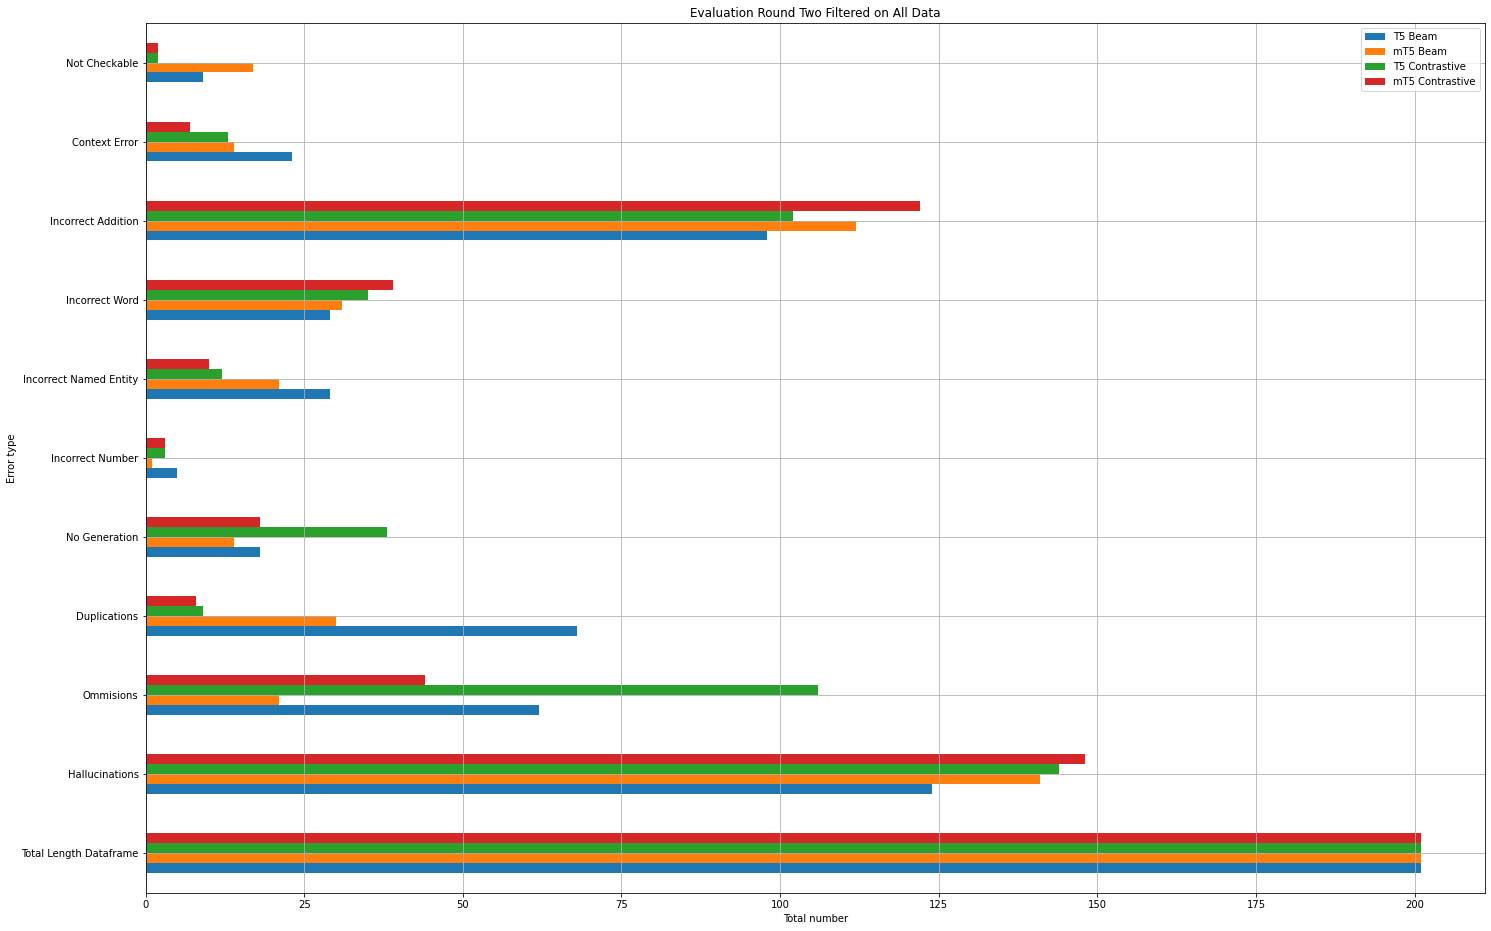

In [ ]:
run_plot(t5_beam_worst_df, mt5_beam_worst_df, t5_contrastive_worst_df, mt5_contrastive_worst_df, "Evaluation Round Two Filtered on All Data")

[ 1  2  4  5  8  6 10 12  3  7  9 13]
[1 3 2 4 8 5 6 7]
[ 1  2  6 10  4  3  8 12  5  7 14]
[1 2 4 3 5 8 6 9 7]


<ipython-input-3-ce6748faea4e>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  dataframe_sums = dataframe.select_dtypes(pd.np.number).sum().rename('total')


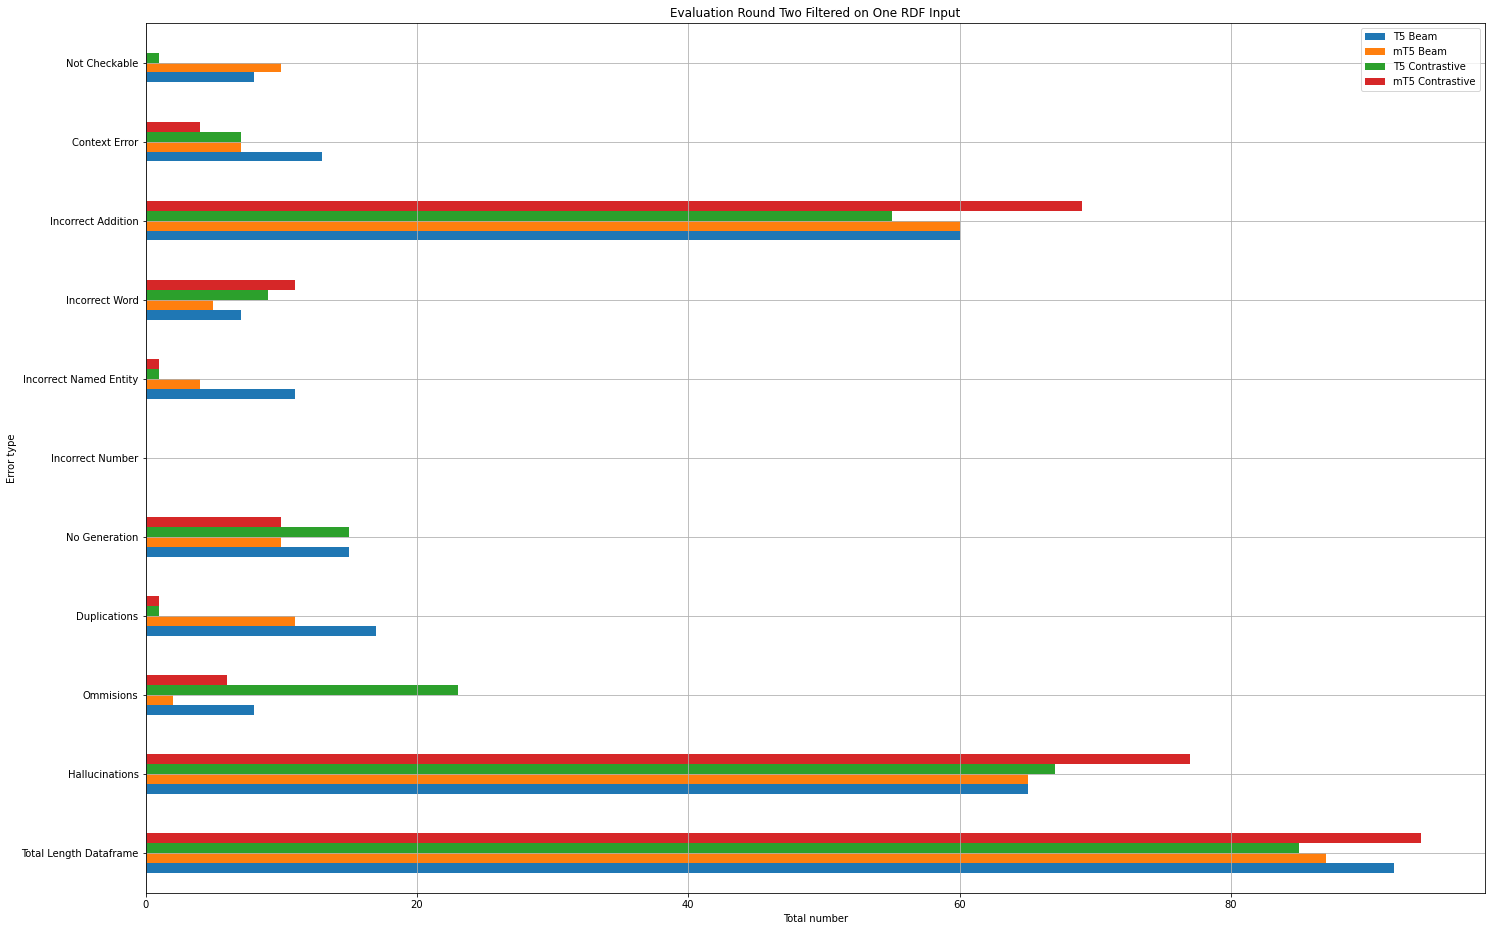

In [ ]:
run_plot(t5_beam_worst_df, mt5_beam_worst_df, t5_contrastive_worst_df, mt5_contrastive_worst_df, "Evaluation Round Two Filtered on One RDF Input", count=1)

[ 1  2  4  5  8  6 10 12  3  7  9 13]
[1 3 2 4 8 5 6 7]
[ 1  2  6 10  4  3  8 12  5  7 14]
[1 2 4 3 5 8 6 9 7]


<ipython-input-3-ce6748faea4e>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  dataframe_sums = dataframe.select_dtypes(pd.np.number).sum().rename('total')


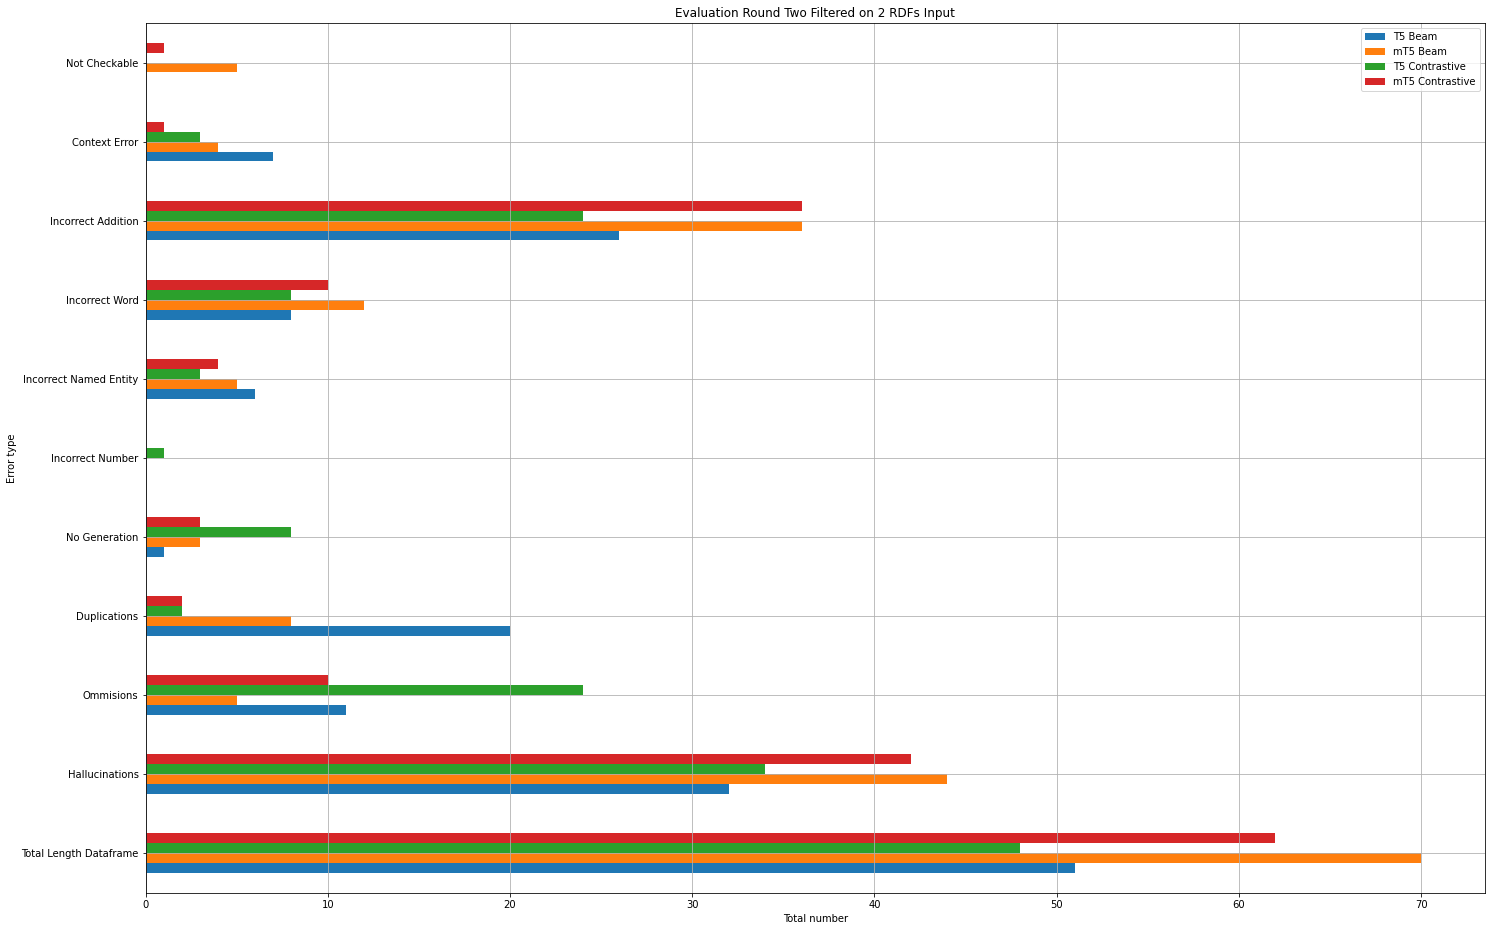

In [ ]:
run_plot(t5_beam_worst_df, mt5_beam_worst_df, t5_contrastive_worst_df, mt5_contrastive_worst_df, "Evaluation Round Two Filtered on 2 RDFs Input", count=2)

[ 1  2  4  5  8  6 10 12  3  7  9 13]
[1 3 2 4 8 5 6 7]
[ 1  2  6 10  4  3  8 12  5  7 14]
[1 2 4 3 5 8 6 9 7]


<ipython-input-3-ce6748faea4e>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  dataframe_sums = dataframe.select_dtypes(pd.np.number).sum().rename('total')


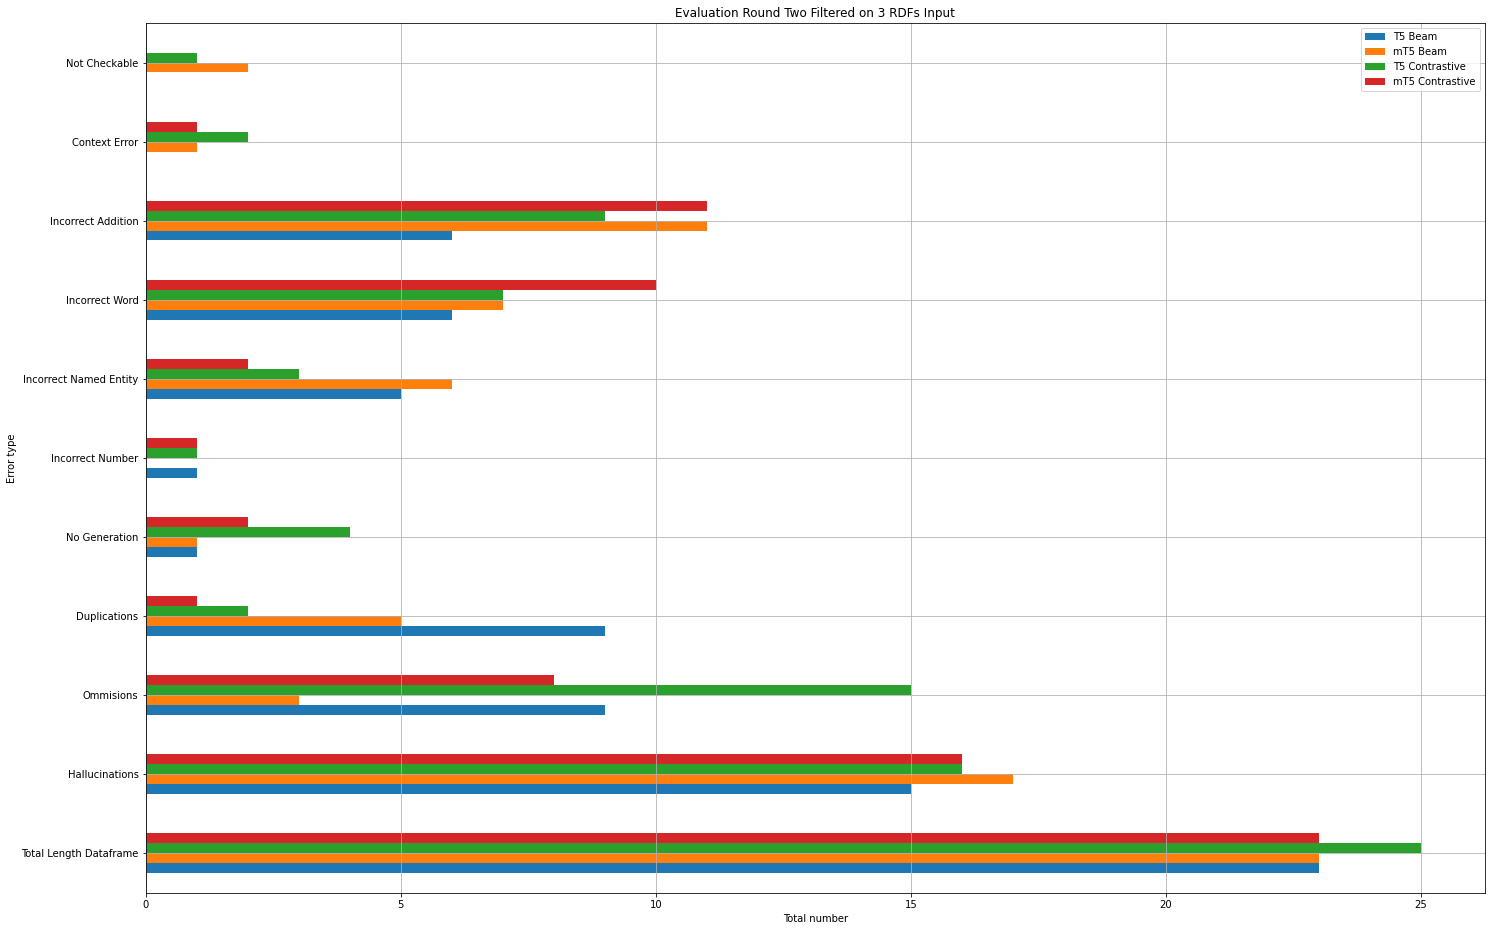

In [ ]:
run_plot(t5_beam_worst_df, mt5_beam_worst_df, t5_contrastive_worst_df, mt5_contrastive_worst_df, "Evaluation Round Two Filtered on 3 RDFs Input", count=3)

[ 1  2  4  5  8  6 10 12  3  7  9 13]
[1 3 2 4 8 5 6 7]
[ 1  2  6 10  4  3  8 12  5  7 14]
[1 2 4 3 5 8 6 9 7]


<ipython-input-3-ce6748faea4e>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  dataframe_sums = dataframe.select_dtypes(pd.np.number).sum().rename('total')


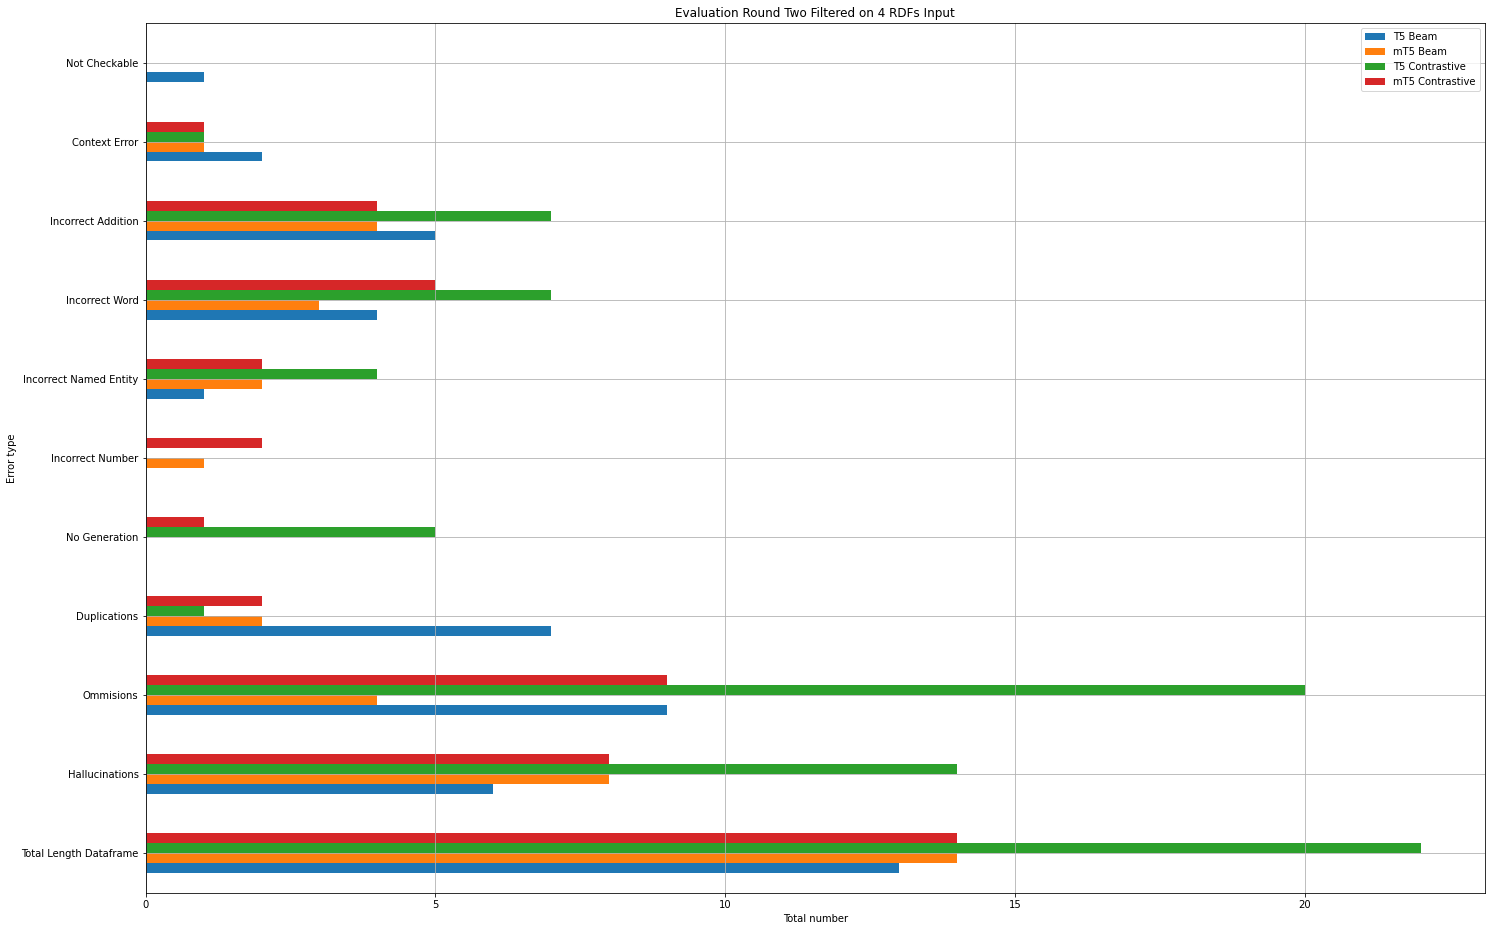

In [ ]:
run_plot(t5_beam_worst_df, mt5_beam_worst_df, t5_contrastive_worst_df, mt5_contrastive_worst_df, "Evaluation Round Two Filtered on 4 RDFs Input", count=4)

[ 1  2  4  5  8  6 10 12  3  7  9 13]
[1 3 2 4 8 5 6 7]
[ 1  2  6 10  4  3  8 12  5  7 14]
[1 2 4 3 5 8 6 9 7]


<ipython-input-3-ce6748faea4e>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  dataframe_sums = dataframe.select_dtypes(pd.np.number).sum().rename('total')


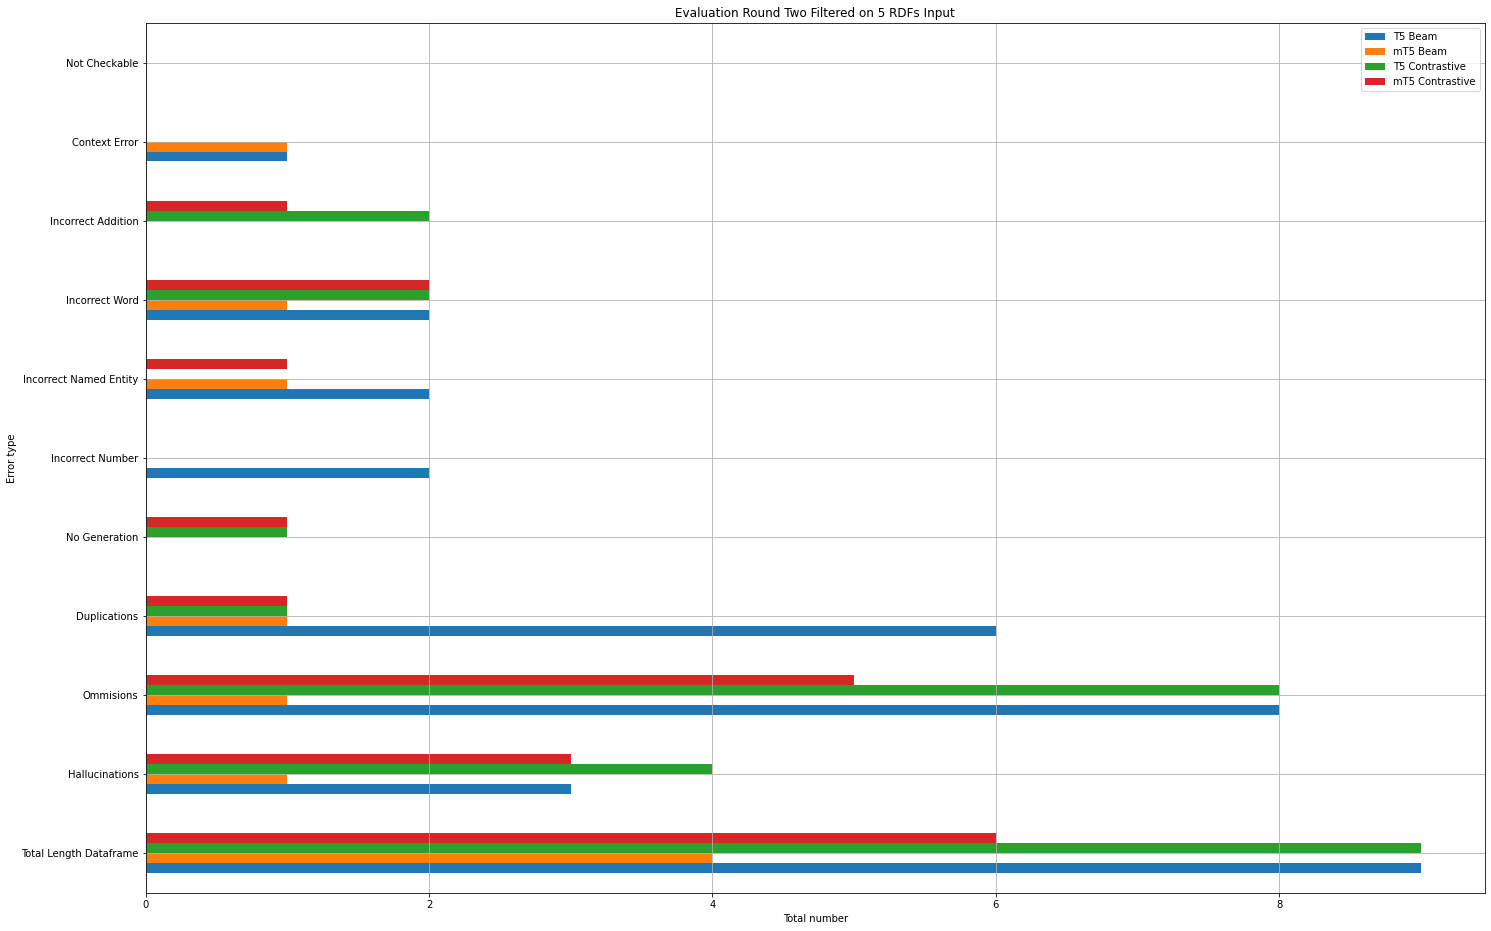

In [ ]:
run_plot(t5_beam_worst_df, mt5_beam_worst_df, t5_contrastive_worst_df, mt5_contrastive_worst_df, "Evaluation Round Two Filtered on 5 RDFs Input", count=5)

[ 1  2  4  5  8  6 10 12  3  7  9 13]
[1 3 2 4 8 5 6 7]
[ 1  2  6 10  4  3  8 12  5  7 14]
[1 2 4 3 5 8 6 9 7]


<ipython-input-3-ce6748faea4e>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  dataframe_sums = dataframe.select_dtypes(pd.np.number).sum().rename('total')


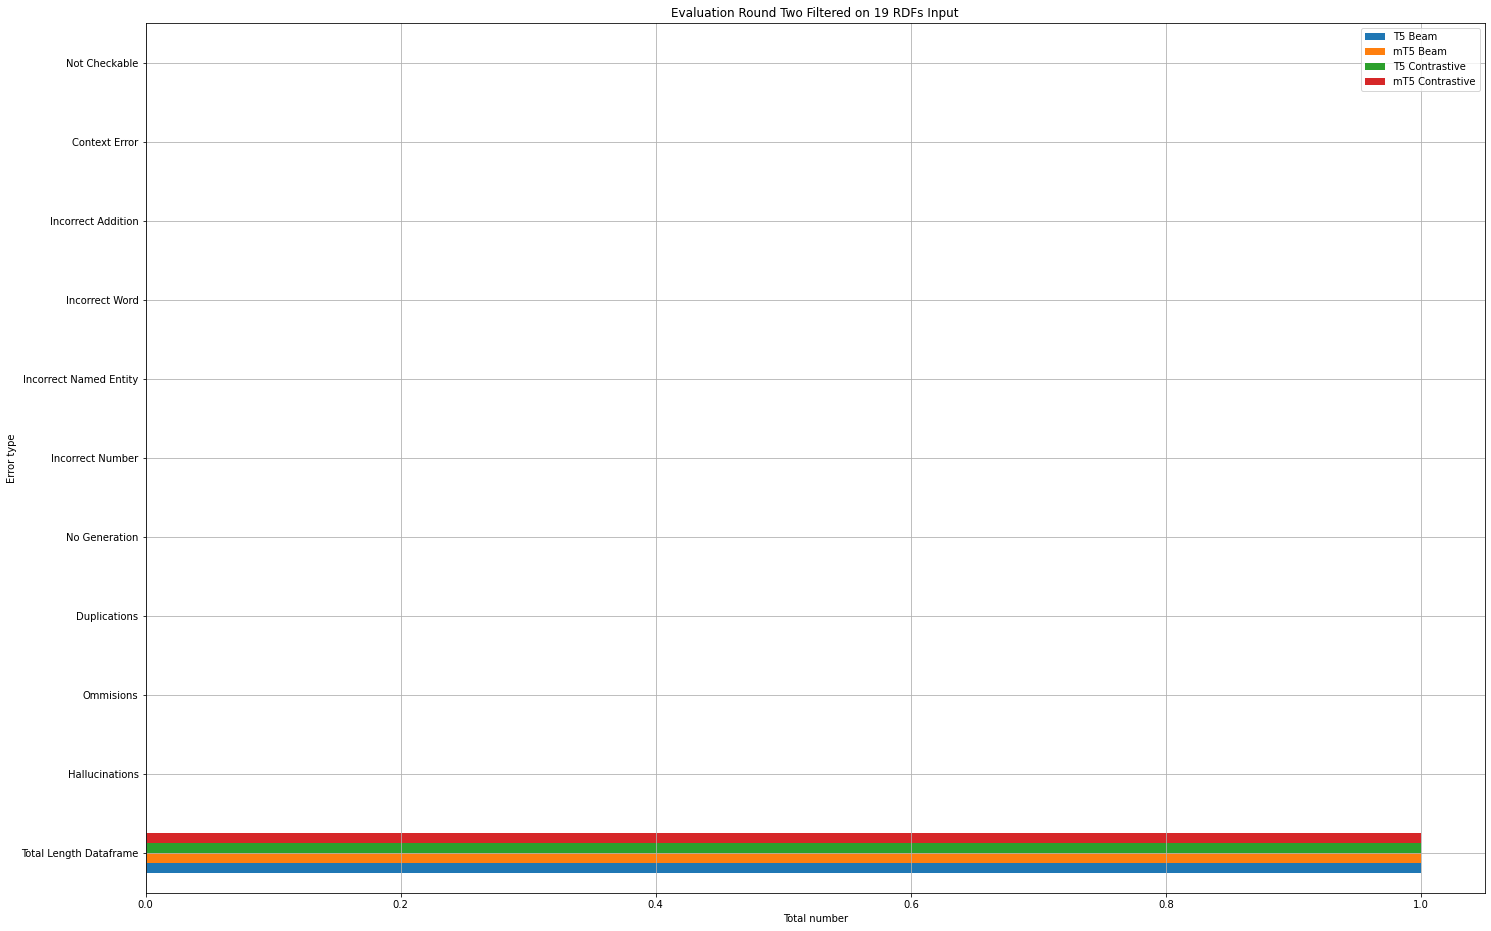

In [ ]:
run_plot(t5_beam_worst_df, mt5_beam_worst_df, t5_contrastive_worst_df, mt5_contrastive_worst_df, "Evaluation Round Two Filtered on 19 RDFs Input", count=19)

### BertViz evaluation

In [ ]:
def run_bertViz_model_view(model, tokenizer, tekst_input, tekst_output, view_type):
  encoder_input_ids = tokenizer(f"{tekst_input}", return_tensors="pt", add_special_tokens=True).input_ids

  with tokenizer.as_target_tokenizer():
      decoder_input_ids = tokenizer(f"{tekst_output}", return_tensors="pt", add_special_tokens=True).input_ids

  outputs = model(input_ids=encoder_input_ids, decoder_input_ids=decoder_input_ids)

  encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
  decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

  if "head" in view_type:
    head_view(
      encoder_attention=outputs.encoder_attentions,
      decoder_attention=outputs.decoder_attentions,
      cross_attention=outputs.cross_attentions,
      encoder_tokens= encoder_text,
      decoder_tokens = decoder_text
      )
  else:
    model_view(
        encoder_attention=outputs.encoder_attentions,
        decoder_attention=outputs.decoder_attentions,
        cross_attention=outputs.cross_attentions,
        encoder_tokens= encoder_text,
        decoder_tokens = decoder_text
    )

In [ ]:
# Generations retrieved from mt5 worst 200 generations Beam + Nucleaus runs
Incident_teksts_input = ["['victimAge | kind']", "['victimAmount | drietal', 'victimVehicle | auto']", "['victimGender | hij', 'victimStatus | overleed']", "['victimAge Group' | 'minor', 'victimGender | female , 'victimRace | Hispanic']", "['suspectStatus | arrested']" ]
Incident_teksts_output = ["De kind is slain and taken to the hospital, according to police.", "De drietal reed in de auto.", "De man overleed en raakte daarna in de berm.",
                          "Another minor female, a Hispanic female, was shot in the head and left with a gunshot wound, police said.", "The suspects were arrested in connection with the shooting."]

Sport_teksts_input = ["['locationPlayed | Baltimore']", "['tackleRecipientName | Kamohelo Mokotjo']", "['teamName | Vitesse', 'teamStandings | negende']", "['goalName | Santos']", "['finalScore | 2-2' ,'stadiumPlayed | Woudestein']"]
Sport_teksts_output = ["Baltimore", "Kamohelo Mokotjo scoorde.", "Vitesse staat nu negende.", "Santos scoorde in de verre hoek.", "Het werd 2-2 in Woudestein."]

Weather_teksts_input = ["['temperatureCelsius | 19.1C', 'timePoint | February 14']", "['temperatureCelsius | above average']", "['temperatureHotCold | cool']", "['locationArea | overal', 'windSpeedBft | 6-7']", "['weatherType | onweer']"]
Weather_teksts_output = ["February 14 - Highest temperature of 19.1C", "Temperatures will be above average.", "What will the weather be like this year?", "De wind is overal matig, 6-7 Bft.", "De lokale politie heeft een onderzoek ingesteld naar de toedracht van het onweer."]

Stock_teksts_input = ["['DATE | the next year']" , "['companyName | ECB', 'timePoint | april']", "['ORG | Beyond Meat']", "['companyName | Federal Reserve']", "['companyName | SEB', 'locationName | Stockholm' , 'stockChangePercentage | ruim 12 procent']"]
Stock_teksts_output = ["The index is set to resume for the next year.", "ECB heeft in april een adviesverlaging ingesteld.", "Beyond Meat is the biggest contributor to Beyond Meat.", "De Federal Reserve heeft een adviesverlaging ingesteld.", "De beursgraadmeters in Stockholm stonden ruim 12 procent lager dan verwacht."]

#### mT5 evaluation

In [ ]:
from bertviz import model_view, head_view
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModel, AutoModelForSeq2SeqLM

model_path = '/content/drive/MyDrive/MscThesis/Results/google/mt5-base/checkpoint-12428 (model)/'

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path, output_attentions=True)

##### Incident evaluation

In [ ]:
run_bertViz_model_view(model, tokenizer,Incident_teksts_input[0], Incident_teksts_output[0], "model_view")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer, Incident_teksts_input[1], Incident_teksts_output[1])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer, Incident_teksts_input[2], Incident_teksts_output[2])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer, Incident_teksts_input[3], Incident_teksts_output[3])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer, Incident_teksts_input[4], Incident_teksts_output[4])

Output hidden; open in https://colab.research.google.com to view.

##### Sport evaluation

In [ ]:
run_bertViz_model_view(model, tokenizer, Sport_teksts_input[0], Sport_teksts_output[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3547: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  "`as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your "


<IPython.core.display.Javascript object>

In [ ]:
run_bertViz_model_view(model, tokenizer, Sport_teksts_input[1], Sport_teksts_output[1])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Input: ['teamName | Vitesse', 'teamStandings | negende']   ---------- Output: Vitesse staat nu negende.
run_bertViz_model_view(model, tokenizer, Sport_teksts_input[2], Sport_teksts_output[2])

Output hidden; open in https://colab.research.google.com to view.

##### Weather evaluation

In [ ]:
# Input: ['temperatureCelsius | 19.1C', 'timePoint | February 14']   ---------- Output: February 14 - Highest temperature of 19.1C", "Temperatures will be above average.

run_bertViz_model_view(model, tokenizer, Weather_teksts_input[0], Weather_teksts_output[0])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Input: ['temperatureCelsius | above average'] ---- Output: Temperatures will be above average.
run_bertViz_model_view(model, tokenizer, Weather_teksts_input[1], Weather_teksts_output[1])

<IPython.core.display.Javascript object>

##### Stock evaluation

In [ ]:
# Input: ['DATE | the next year']   ---------- Output: The index is set to resume for the next year.

run_bertViz_model_view(model, tokenizer, Stock_teksts_input[0], Stock_teksts_output[0])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Input: ['companyName | ECB', 'timePoint | april']   ---------- Output: ECB heeft in april een adviesverlaging ingesteld.

run_bertViz_model_view(model, tokenizer, Stock_teksts_input[1], Stock_teksts_output[1])

Output hidden; open in https://colab.research.google.com to view.

#### T5 evaluation

In [ ]:
from bertviz import model_view
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModel, AutoModelForSeq2SeqLM

model_path = '/content/drive/MyDrive/MscThesis/Models/dutchT5/'

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path, output_attentions=True)

In [ ]:
# Generations retrieved from t5 worst 200 generations Beam + Nucleaus runs
t5_Incident_teksts_input = ["['victimAge | kind']", "['victimAmount | drietal', 'victimVehicle | auto']", "['victimGender | hij', 'victimStatus | overleed']", "['victimAge Group' | 'minor', 'victimGender | female , 'victimRace | Hispanic']", "['suspectStatus | arrested']" ]
t5_Incident_teksts_output = ["At least once, the child was found in his career.", "Het drietal zat in de auto.", "Hij overleed ter plaatse.",
                          "Hispanic female victims and female female", "The arrested suspects were arrested as they were arrested."]

t5_Sport_teksts_input = ["['playerName | Guardado']", "['redCardName | Sam Larsson', 'refereeName | Kamphuis']", "['batterName | Reynolds']"]
t5_Sport_teksts_output = ["Guardado was not amused.", "Sam Larsson en Sam Larsson wonnen de play-offs.", "The brother of the two people said: Reynolds, who is looking for him."]

t5_Weather_teksts_input = ["['precipitationAmount | veel']","['locationArea | overal', 'windSpeedBft | 6-7']"]
t5_Weather_teksts_output = ["De dealers gaven aan dat er veel mensen zijn die veel geld over hebben.", "De wind is overal matig, 6-7 Bft."]

t5_Stock_teksts_input = ["['DATE | today']" , "['locationName | China', 'locationName | Wall Street']"]
t5_Stock_teksts_output = ["However, todays shares are not reluctant to the market.", "The Wall Street index is not shared between China and China, according to news on its financial policies."]

##### Incident evaluation

In [ ]:
run_bertViz_model_view(model, tokenizer,t5_Incident_teksts_input[0], t5_Incident_teksts_output[0])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer, t5_Incident_teksts_input[1], t5_Incident_teksts_output[1])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer, t5_Incident_teksts_input[2], t5_Incident_teksts_output[2])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer, t5_Incident_teksts_input[3], t5_Incident_teksts_output[3])

In [ ]:
run_bertViz_model_view(model, tokenizer, t5_Incident_teksts_input[4], t5_Incident_teksts_output[4])

Output hidden; open in https://colab.research.google.com to view.

##### Sport evaluation

In [ ]:
run_bertViz_model_view(model, tokenizer, t5_Sport_teksts_input[0], t5_Sport_teksts_output[0])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer, t5_Sport_teksts_input[1], t5_Sport_teksts_output[1])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer, t5_Sport_teksts_input[2], t5_Sport_teksts_output[2])

Output hidden; open in https://colab.research.google.com to view.

##### Weather evaluation

In [ ]:
run_bertViz_model_view(model, tokenizer, t5_Weather_teksts_input[0], t5_Weather_teksts_output[0])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer, t5_Weather_teksts_input[1], t5_Weather_teksts_output[1])

Output hidden; open in https://colab.research.google.com to view.

##### Stock evaluation

In [ ]:
run_bertViz_model_view(model, tokenizer, t5_Stock_teksts_input[0], t5_Stock_teksts_output[0])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer, t5_Stock_teksts_input[1], t5_Stock_teksts_output[1])

Output hidden; open in https://colab.research.google.com to view.

### Summed Attention Heads

##### Sports

In [ ]:
Input_text = ["'assistName | Kevin Jansen','goalName | Bakker','positionOfPlayer | keeper']", "['goalScore | 1-0','teamName | Heerenveen']"]
Output_text = ["De keeper van Bakker kreeg de bal op keeper Kevin Jansen.", "Heerenveen kreeg een enorme kans op de 1-0."]

In [ ]:
run_bertViz_model_view(model, tokenizer,Input_text[0], Output_text[0], "head_view")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer,Input_text[1], Output_text[1], "head_view")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
good_input = ["('goalScore | op voorsprong','matchTime | na een kwartier spelen','teamName | Ajax')"]
good_output = ["Ajax kwam na een kwartier spelen op voorsprong."]

In [ ]:
run_bertViz_model_view(model, tokenizer,good_input[0], good_output[0], "head_view")

Output hidden; open in https://colab.research.google.com to view.

2nd good sport example for mT5

In [ ]:

good_input = ["'coachName | Ernest Faber','matchDate | zondag','matchStreakNumber | derde','matchStreakType | won'"]
good_output = ["De ploeg van trainer Ernest Faber won zondag voor de derde keer in de Eredivisie."]

In [ ]:
run_bertViz_model_view(model, tokenizer,good_input[0], good_output[0], "head_view")

Output hidden; open in https://colab.research.google.com to view.

##### Other check

In [ ]:
Input_text = ["'companyName | ECB','timePoint | april'", "['victimStatus | slachtoffer']", "['pitchResult | walks','pitcherName | Scherzer', 'retireNumber | 25', 'teamName | Twins']",
                "['companyName | Bitcoin' , 'stockChange | vermindering' , 'stockChangePercentage | 15,07%' , 'timePoint | In de afgelopen zeven dagen']"]
Output_text = ["ECB heeft in april een adviesverlaging ingesteld.", "Het slachtoffer reed naar het ziekenhuis en reed met zijn auto over de kop en botste tegen een boom.", "Scherzer retired 25 of his previous 25 retirees."
                ,"In de afgelopen zeven dagen heeft Bitcoin een vermindering in zijn waarde gekend van 15,07%."]

In [ ]:
run_bertViz_model_view(model, tokenizer,Input_text[1], Output_text[1], "head_view")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer,Input_text[2], Output_text[2], "head_view")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer,Input_text[3], Output_text[3], "head_view")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer,Input_text[0], Output_text[0], "head_view")

Output hidden; open in https://colab.research.google.com to view.

### Comparison good v poor

In [ ]:
Good_tekst_input =["['companyName | Ethereum','exchangeName | Investing.com Index','moneyAmount | $185,12','stockChange | verlies','stockChangePercentage | 7,21%']", 
                   "['hitNumber | five','inningsPitched | six','pitcherName | Buehler','pitcherRecord | 2-1','runNumber | two']"]
Good_tekst_generation =["Ethereum handelde op $185,12 op de Investing.com Index, met een verlies van 7,21%.", "Buehler (2-1) gave up two runs and five hits in six innings."]

Poor_tekst_input = ["['exchangeName | Footsie']", "['assistName | Kevin Jansen','goalName | Bakker','positionOfPlayer | keeper']"]
Poor_tekst_generation = ["Footsie was de grootste stijger in de eredivisie.", "De keeper van Bakker kreeg de bal op keeper Kevin Jansen."]

In [ ]:
run_bertViz_model_view(model, tokenizer,Poor_tekst_input[0], Poor_tekst_generation[0], "head_view")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer,Good_tekst_input[0], Good_tekst_generation[0], "head_view")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer,Poor_tekst_input[1], Poor_tekst_generation[1], "head_view")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_bertViz_model_view(model, tokenizer,Good_tekst_input[1], Good_tekst_generation[1], "head_view")

Output hidden; open in https://colab.research.google.com to view.

### ECCO Evaluation

In [ ]:
# good source https://github.com/jalammar/ecco/blob/main/notebooks/Identifying%20model%20configuration.ipynb

import ecco
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModel, AutoModelForSeq2SeqLM
hf_model_id = '/content/drive/MyDrive/MscThesis/Models/google_mt5-base/'
      

# 1- load the model the tokenizer
tokenizer = AutoTokenizer.from_pretrained(hf_model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(hf_model_id)  

model_config = {
    'embedding': "encoder.embed_tokens", 
    'type': 'enc-dec',
    'token_prefix': '',
    'activations': ['SelfAttention\.o'],
    'partial_token_prefix': ''
}
ecco_model = ecco.from_pretrained(hf_model_id, 
                                  activations=True,
                                  model_config=model_config)

In [ ]:
# text = ''' Now I ask you: \n what can be expected of man since he is a being endowed with strange qualities? Shower upon him every earthly blessing, drown him in a sea of happiness, so that nothing but bubbles of bliss can be seen on the surface; give him economic prosperity, such that he should have nothing else to do but sleep, eat cakes and busy himself with the continuation of his species, and even then out of sheer ingratitude, sheer spite, man would play you some nasty trick. He would even risk his cakes and would deliberately desire the most fatal rubbish, the most uneconomical absurdity, simply to introduce into all this positive good sense his fatal fantastic element. It is just his fantastic dreams, his vulgar folly that he will desire to retain, simply in order to prove to himself--as though that were so necessary-- that men still are men and not the keys of a piano, which the laws of nature threaten to control so completely that soon one will be able to desire nothing but by the calendar. And that is not all: even if man really were nothing but a piano-key, even if this were proved to him by natural science and mathematics, even then he would not become reasonable, but would purposely do something perverse out of simple ingratitude, simply to gain his point. And if he does not find means he will contrive destruction and chaos, will contrive sufferings of all sorts, only to gain his point! He will launch a curse upon the world, and as only man can curse (it is his privilege, the primary distinction between him and other animals), may be by his curse alone he will attain his object--that is, convince himself that he is a man and not a piano-key!'''

# inputs = ecco_model.tokenizer(text, return_tensors="pt")
# output = ecco_model(inputs)

# #nmf_1 = output.run_nmf(n_components=8) 

# #nmf_1.explore()

Change ecco/lm.py to this:

        embedding_matrix = self.model_embeddings

        vocab_size = embedding_matrix.num_embeddings

        one_hot_tensor = self.to(_one_hot_batched(input_ids, vocab_size))
        token_ids_tensor_one_hot = one_hot_tensor.clone().requires_grad_(True)

        inputs_embeds = torch.matmul(token_ids_tensor_one_hot, embedding_matrix.weight)
        return inputs_embeds, token_ids_tensor_one_hot

In [ ]:
text= "'locationArea | overal', 'timePoint | In de avond', 'windChange | af'"
output = ecco_model.generate(text, generate=10, do_sample=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ecco/output.py:469: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  token_id = torch.tensor(self.token_ids[0][offset + j])


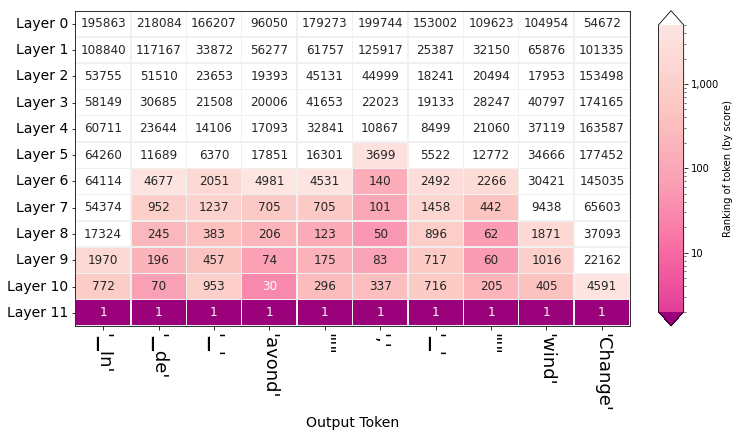

In [ ]:
output.rankings()

In [ ]:
text= "'locationArea | overal', 'timePoint | In de avond', 'windChange | af'"
output = ecco_model.generate(text, generate=20, do_sample=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
text= "'victimGender | hij', 'victimStatus | overleed'"
output = ecco_model.generate(text, generate=20, do_sample=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

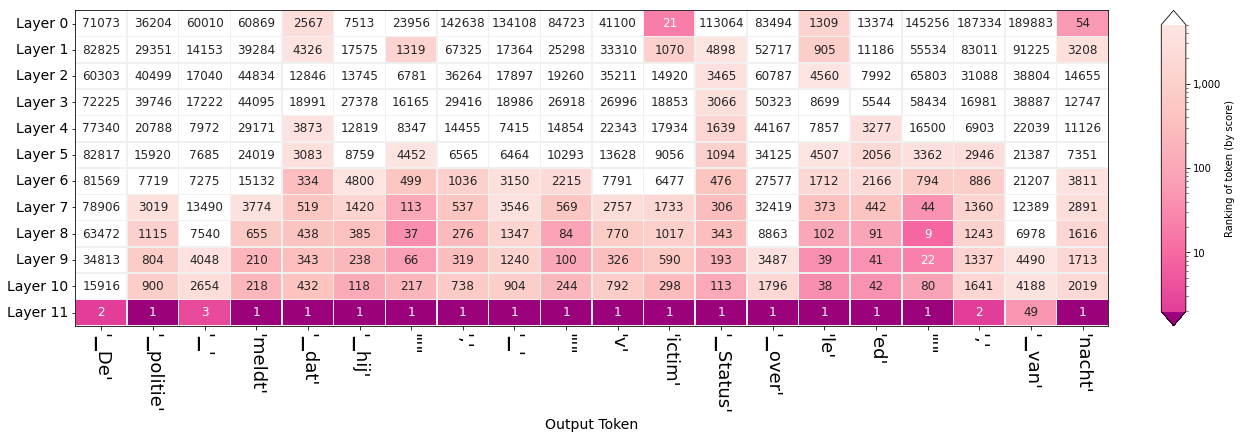

In [ ]:
output.rankings()

##### Output Token Scores

###### Wind

In [ ]:
#Wind example
output.layer_predictions(position=32, topk=5)

<IPython.core.display.Javascript object>

In [ ]:
#Wind example
output.layer_predictions(position=37, topk=5)

<IPython.core.display.Javascript object>

###### Incident


In [ ]:
#Wind example
output.layer_predictions(position=32, topk=5)

<IPython.core.display.Javascript object>

In [ ]:
#Wind example
output.layer_predictions(position=22, topk=5)

<IPython.core.display.Javascript object>

##### Input Saliency

In [ ]:
# Attributions: Please choose one of the methods: ['integrated_gradients', 'gradient', 'grad_x_input', 'deep_lift', 'deep_lift_shap', 'guided_backprop', 'guided_gradcam', 'deconvolution', 'layer_relevance_propagation']

#text= "'locationArea | overal', 'timePoint | In de avond', 'windChange | af'"
text = '''assistName | Kevin Jansen','goalName | Bakker','positionOfPlayer | keeper'''
# Pass in `attribution` argument the list of primary attributions to be computed
# With ['ig', 'grad_x_input'] we are calculating Integrated Gradients and Input X Gradient saliency attributions
output = ecco_model.generate(text, generate=20, do_sample=True, attribution=["integrated_gradients"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output.explorable()

<IPython.core.display.Javascript object>

In [ ]:
output.primary_attributions(attr_method='integrated_gradients')

<IPython.core.display.Javascript object>

In [ ]:
#text= "'locationArea | overal', 'timePoint | In de avond', 'windChange | af'"
text = '''goalScore | 1-0','teamName | Heerenveen'''
# Pass in `attribution` argument the list of primary attributions to be computed
# With ['ig', 'grad_x_input'] we are calculating Integrated Gradients and Input X Gradient saliency attributions
output_2 = ecco_model.generate(text, generate=20, do_sample=True, attribution=["gradient"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output_2.primary_attributions(attr_method='gradient')

<IPython.core.display.Javascript object>

##### Trying Neuron Factors

In [ ]:
text= '''"'locationArea | overal', 'timePoint | In de avond', 'windChange | af'"'''

output_2 = ecco_model.generate(text, generate=20, do_sample=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Factorize activations in all the layers
nmf_2 = output_2.run_nmf(n_components=12) 

In [ ]:
nmf_2.explore()

<IPython.core.display.Javascript object>

In [ ]:
nmf_2 = output.run_nmf(n_components=10, from_layer=0, to_layer=1)

In [ ]:
nmf_2.explore()

In [ ]:

text= '''assistName | Kevin Jansen','goalName | Bakker','positionOfPlayer | keeper'''

output = ecco_model.generate(text, generate=20, do_sample=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
nmf_1 = output.run_nmf(n_components=12) 
nmf_1.explore()

<IPython.core.display.Javascript object>

In [ ]:

text= '''coachName | Ernest Faber','matchDate | zondag','matchStreakNumber | derde','matchStreakType | won'''

output_3 = ecco_model.generate(text, generate=20, do_sample=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
nmf_3 = output_3.run_nmf(n_components=12) 
nmf_3.explore()

<IPython.core.display.Javascript object>

### Tensorboard Runs

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
import json

#### Other test (tbParse)

In [ ]:
!pip install tensorflow --quiet # or tensorflow-cpu 
!pip install -U tbparse --quiet # requires Python >= 3.7

In [ ]:
from tbparse import SummaryReader

# Stock_log_dir = "/content/drive/MyDrive/MscThesis/Models/runs/Stock_run_Stock_first/"
# Stock_reader = SummaryReader(Stock_log_dir, pivot=True)
# Stock_df = Stock_reader.scalars


def setup_run_dfs(log_path, run_subject):
  reader = SummaryReader(log_path, pivot=True)
  df_run = reader.scalars
  df_run['Run'] = run_subject

  return df_run



##### Stock First Histograms

In [ ]:
Stock_df = setup_run_dfs("/content/drive/MyDrive/MscThesis/Models/Tensorboard_runs/Stock_first/Stock_run/", "Stock")
Sport_df = setup_run_dfs("/content/drive/MyDrive/MscThesis/Models/Tensorboard_runs/Stock_first/Sport_run/", "Sport")
Weather_df = setup_run_dfs("/content/drive/MyDrive/MscThesis/Models/Tensorboard_runs/Stock_first/Weather_run/", "Weather")
Incident_df = setup_run_dfs("/content/drive/MyDrive/MscThesis/Models/Tensorboard_runs/Stock_first/Incident_run/", "Incident")

In [ ]:
Stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   step                            36 non-null     int64  
 1   eval/loss                       36 non-null     float64
 2   eval/runtime                    36 non-null     float64
 3   eval/samples_per_second         36 non-null     float64
 4   eval/steps_per_second           36 non-null     float64
 5   train/epoch                     36 non-null     object 
 6   train/learning_rate             36 non-null     float64
 7   train/loss                      36 non-null     float64
 8   train/total_flos                1 non-null      float64
 9   train/train_loss                1 non-null      float64
 10  train/train_runtime             1 non-null      float64
 11  train/train_samples_per_second  1 non-null      float64
 12  train/train_steps_per_second    1 non-

In [ ]:
full_df_Stock_First = pd.concat([Stock_df, Sport_df, Weather_df, Incident_df], ignore_index=True)

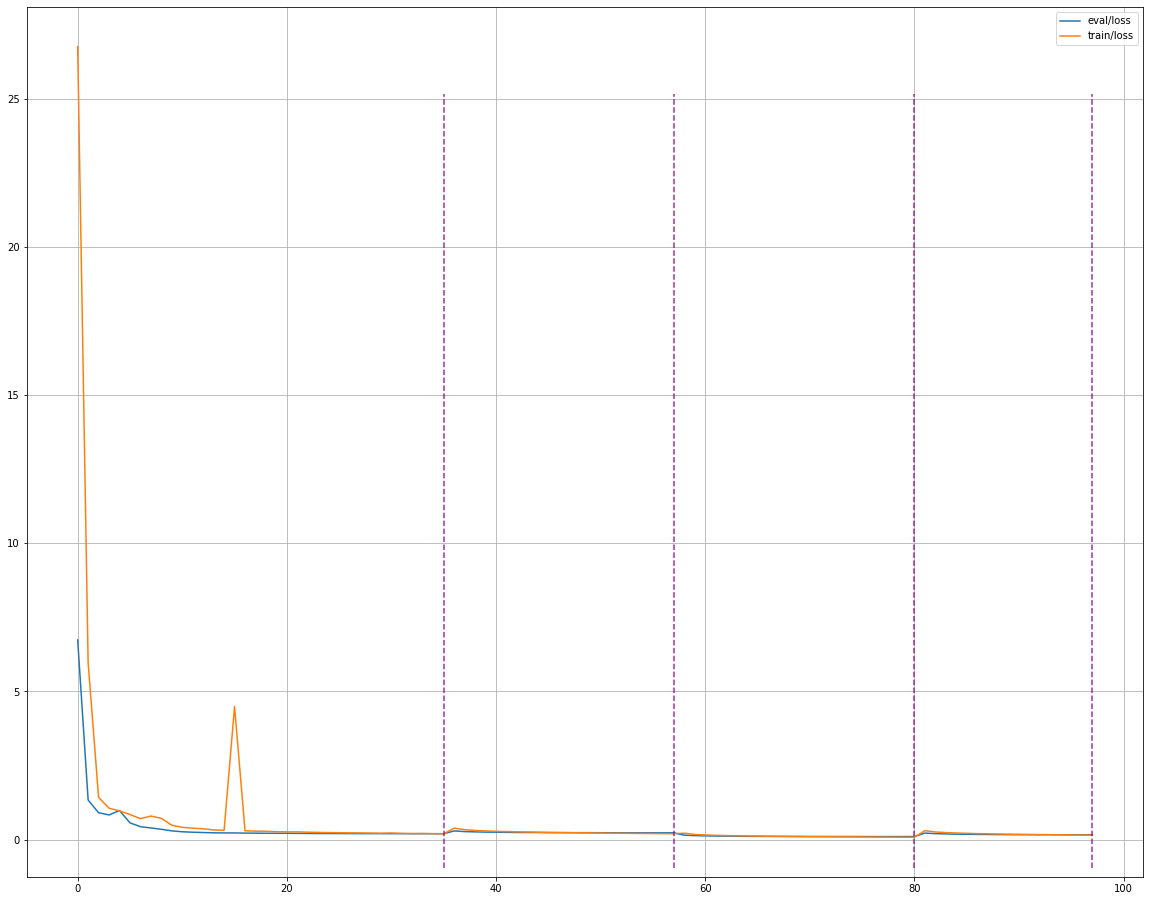

In [ ]:
train_loss = full_df_Stock_First['train/loss']
# plt.plot(complete_to_one)

full_df_Stock_First.plot( y=["eval/loss", "train/loss"], figsize=(20,16), grid=True)
plt.axvline(35, ymin=0.01, ymax=0.9, alpha=0.8, color='purple', ls='--')
plt.axvline(57, ymin=0.01, ymax=0.9, alpha=0.8, color='purple', ls='--')
plt.axvline(80, ymin=0.01, ymax=0.9, alpha=0.8, color='purple', ls='--')
plt.axvline(97, ymin=0.01, ymax=0.9, alpha=0.8, color='purple', ls='--')

Text(0.5, 0.98, 'Train and Evaluation Losses of Sport First Run')

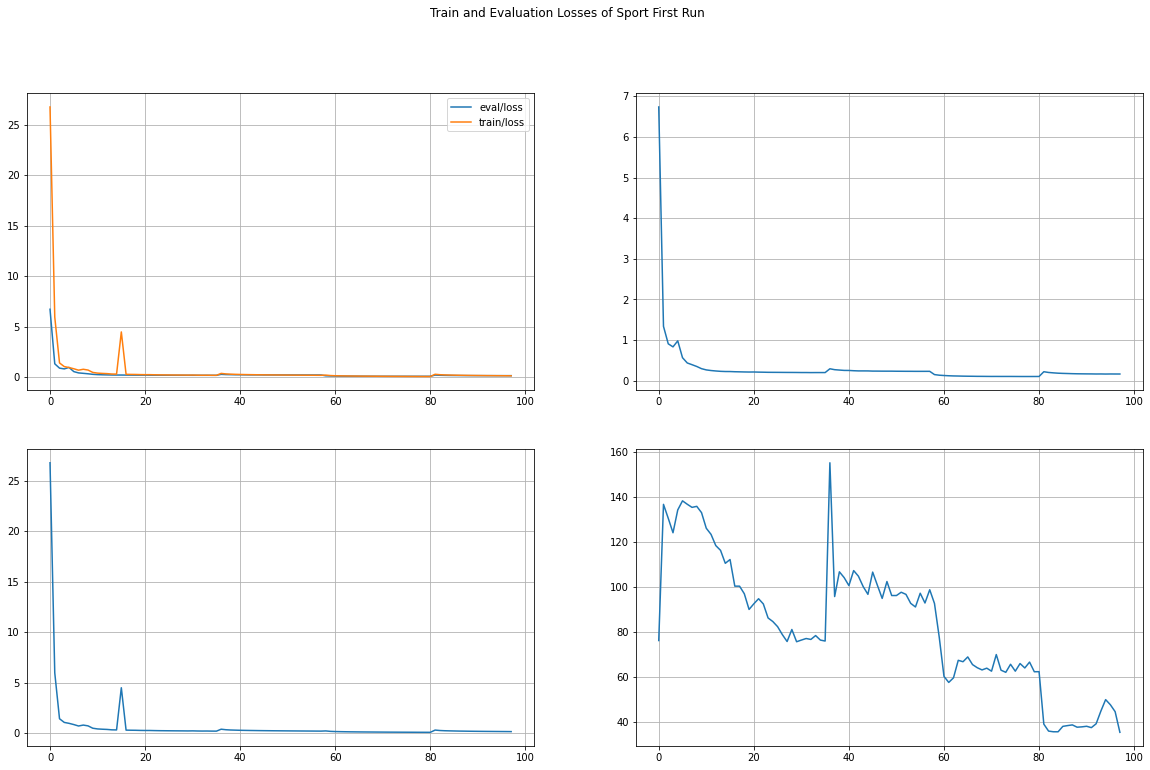

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

full_df_Stock_First.plot( y=["eval/loss", "train/loss"], grid=True, ax=axes[0,0])
#ax.set_title("Title for first plot")
full_df_Stock_First["eval/loss"].plot(grid=True, ax=axes[0,1])
full_df_Stock_First["train/loss"].plot( grid=True, ax=axes[1,0])
full_df_Stock_First["eval/runtime"].plot( grid=True, ax=axes[1,1])
plt.suptitle('Train and Evaluation Losses of Sport First Run')

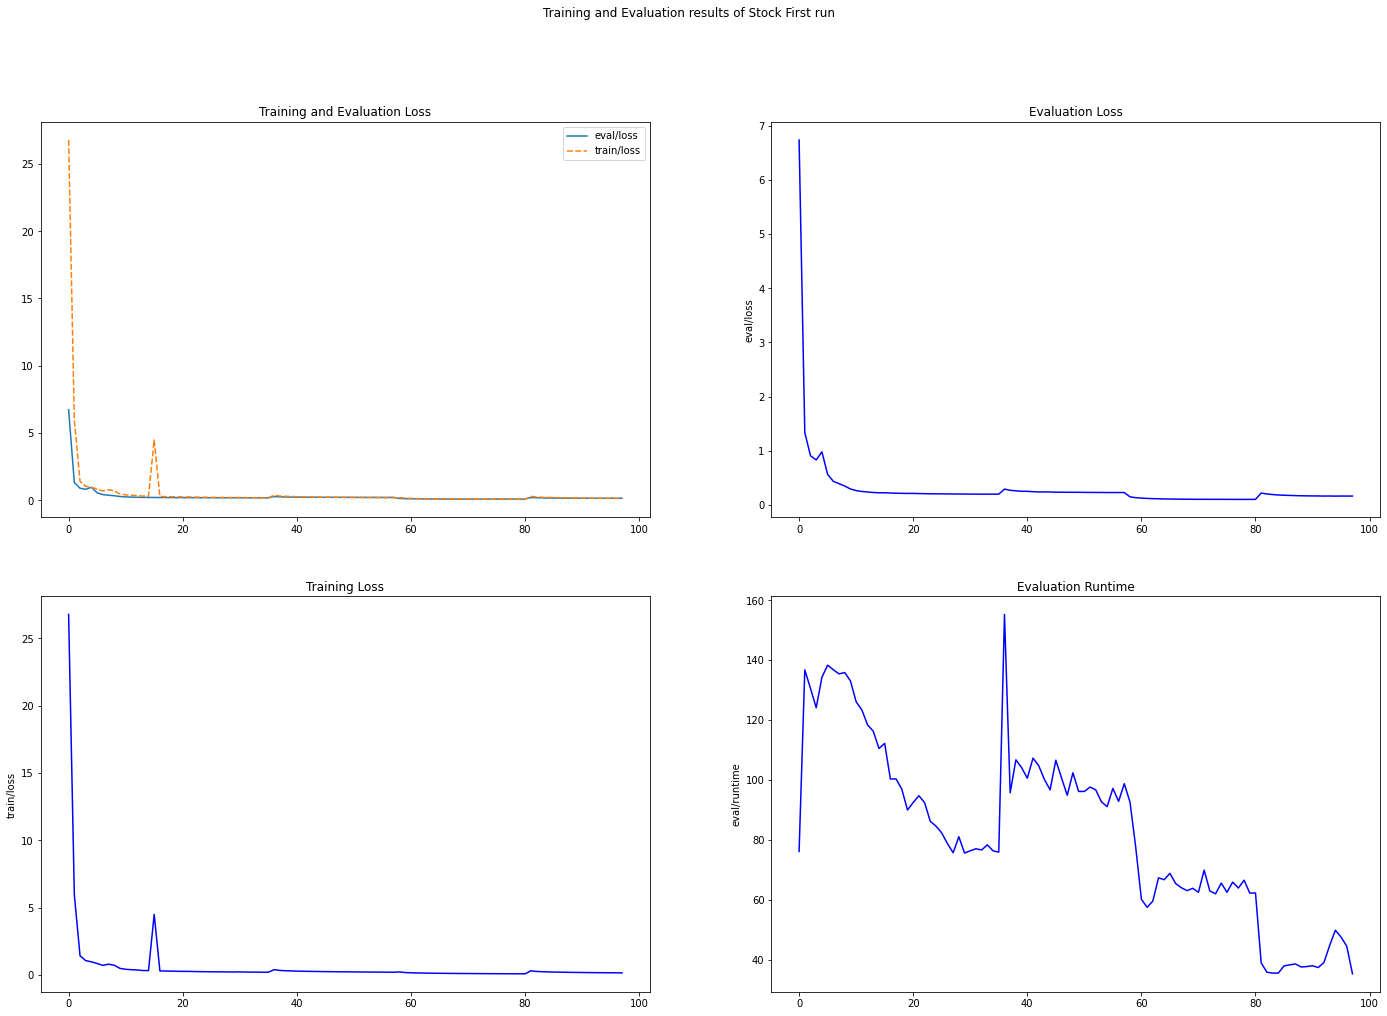

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(24, 16))
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# plt.rcParams["figure.figsize"] = (24,16)

sns.lineplot(data=[full_df_Stock_First["eval/loss"], full_df_Stock_First["train/loss"]], color="blue", ax=axs[0, 0]).set_title('Training and Evaluation Loss')
sns.lineplot(data=full_df_Stock_First["eval/loss"], color="blue", ax=axs[0, 1]).set_title('Evaluation Loss')
sns.lineplot(data=full_df_Stock_First["train/loss"], color="blue", ax=axs[1, 0]).set_title('Training Loss')
sns.lineplot(data=full_df_Stock_First["eval/runtime"], color="blue", ax=axs[1, 1]).set_title('Evaluation Runtime')

plt.suptitle('Training and Evaluation results of Stock First run')
plt.show()

##### Sport First Eval

In [ ]:
Stock_df = setup_run_dfs("/content/drive/MyDrive/MscThesis/Models/Tensorboard_runs/Sport_first/StockV2_run/", "Stock")
Sport_df = setup_run_dfs("/content/drive/MyDrive/MscThesis/Models/Tensorboard_runs/Sport_first/Sport_run/", "Sport")
Weather_df = setup_run_dfs("/content/drive/MyDrive/MscThesis/Models/Tensorboard_runs/Sport_first/Weather_run/", "Weather")
Incident_df = setup_run_dfs("/content/drive/MyDrive/MscThesis/Models/Tensorboard_runs/Sport_first/Incident_run/", "Incident")

In [ ]:
full_df_Sport_First = pd.concat([Sport_df, Stock_df, Weather_df, Incident_df], ignore_index=True)

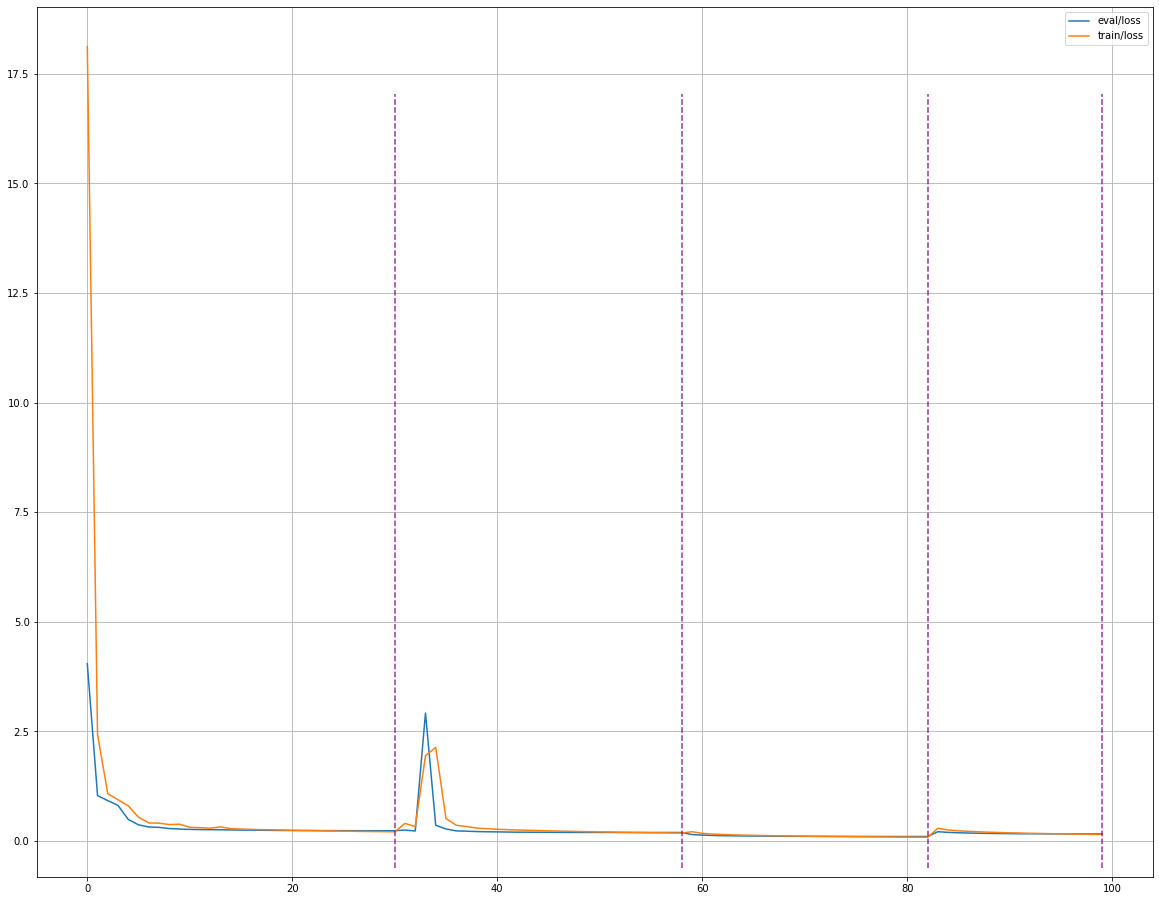

In [ ]:
train_loss = full_df_Stock_First['train/loss']
# plt.plot(complete_to_one)

full_df_Sport_First.plot( y=["eval/loss", "train/loss"], figsize=(20,16), grid=True)
plt.axvline(30, ymin=0.01, ymax=0.9, alpha=0.8, color='purple', ls='--')
plt.axvline(58, ymin=0.01, ymax=0.9, alpha=0.8, color='purple', ls='--')
plt.axvline(82, ymin=0.01, ymax=0.9, alpha=0.8, color='purple', ls='--')
plt.axvline(99, ymin=0.01, ymax=0.9, alpha=0.8, color='purple', ls='--')

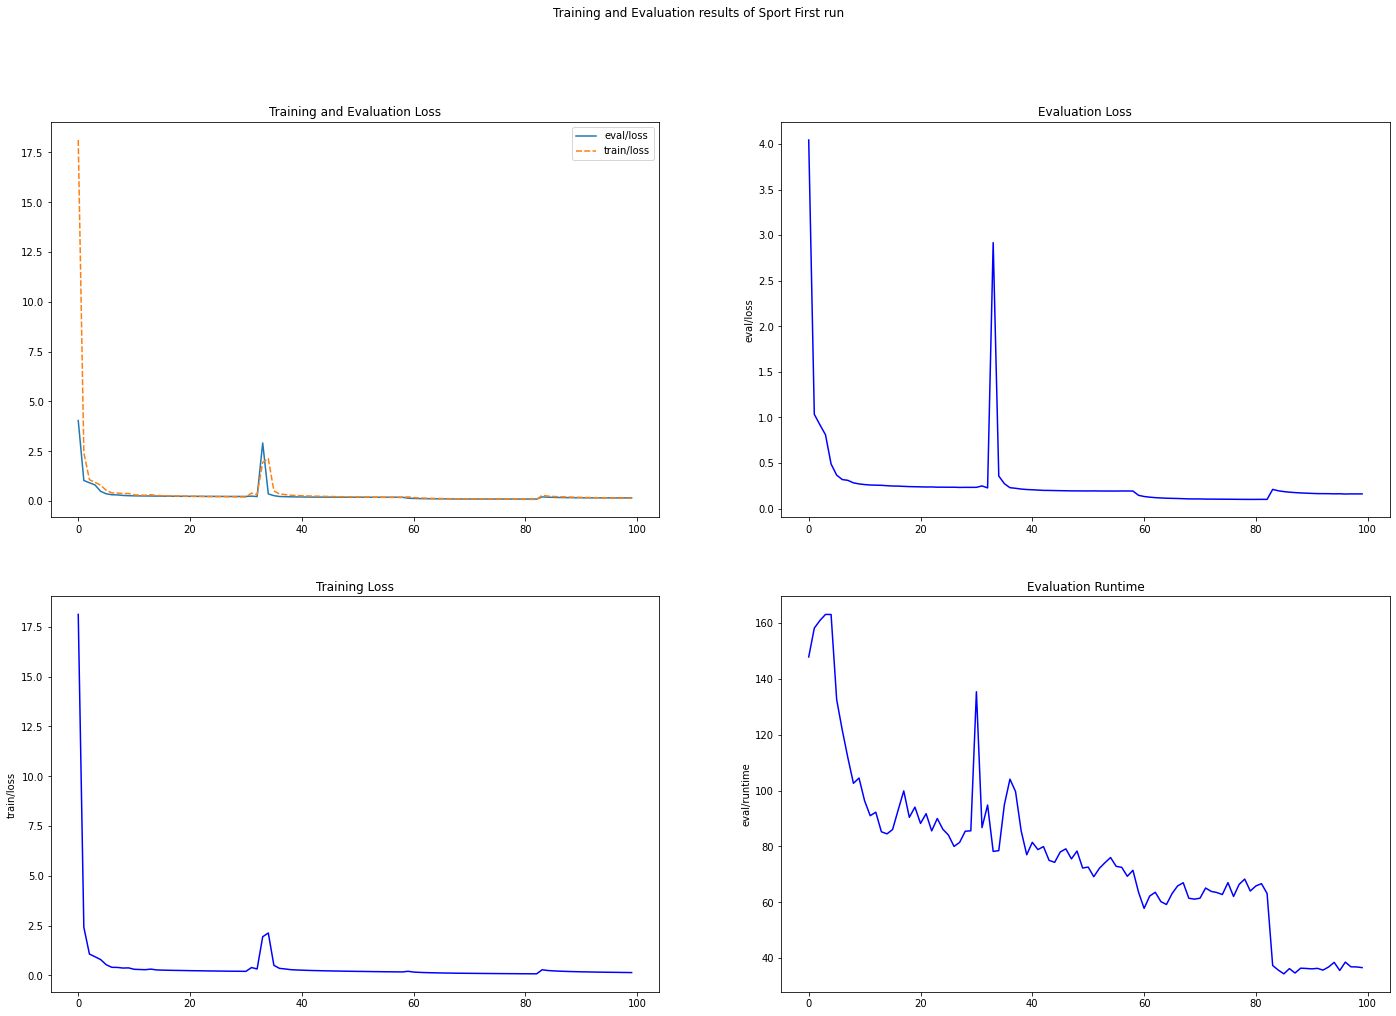

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(24, 16))
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# plt.rcParams["figure.figsize"] = (24,16)

sns.lineplot(data=[full_df_Sport_First["eval/loss"], full_df_Sport_First["train/loss"]], color="blue", ax=axs[0, 0]).set_title('Training and Evaluation Loss')
sns.lineplot(data=full_df_Sport_First["eval/loss"], color="blue", ax=axs[0, 1]).set_title('Evaluation Loss')
sns.lineplot(data=full_df_Sport_First["train/loss"], color="blue", ax=axs[1, 0]).set_title('Training Loss')
sns.lineplot(data=full_df_Sport_First["eval/runtime"], color="blue", ax=axs[1, 1]).set_title('Evaluation Runtime')

plt.suptitle('Training and Evaluation results of Sport First run')
plt.show()

##### Previous mT5

In [ ]:
previous_mT5 = setup_run_dfs("/content/drive/MyDrive/MscThesis/Models/Tensorboard_runs/Previous_mT5/", "Stock")

In [ ]:
previous_mT5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   step                            29 non-null     int64  
 1   eval/loss                       29 non-null     float64
 2   eval/runtime                    29 non-null     float64
 3   eval/samples_per_second         29 non-null     float64
 4   eval/steps_per_second           29 non-null     float64
 5   train/epoch                     29 non-null     object 
 6   train/learning_rate             29 non-null     float64
 7   train/loss                      29 non-null     float64
 8   train/total_flos                1 non-null      float64
 9   train/train_loss                1 non-null      float64
 10  train/train_runtime             1 non-null      float64
 11  train/train_samples_per_second  1 non-null      float64
 12  train/train_steps_per_second    1 non-

Text(0.5, 0.98, 'Train and Evaluation Losses of All Data mT5 Run')

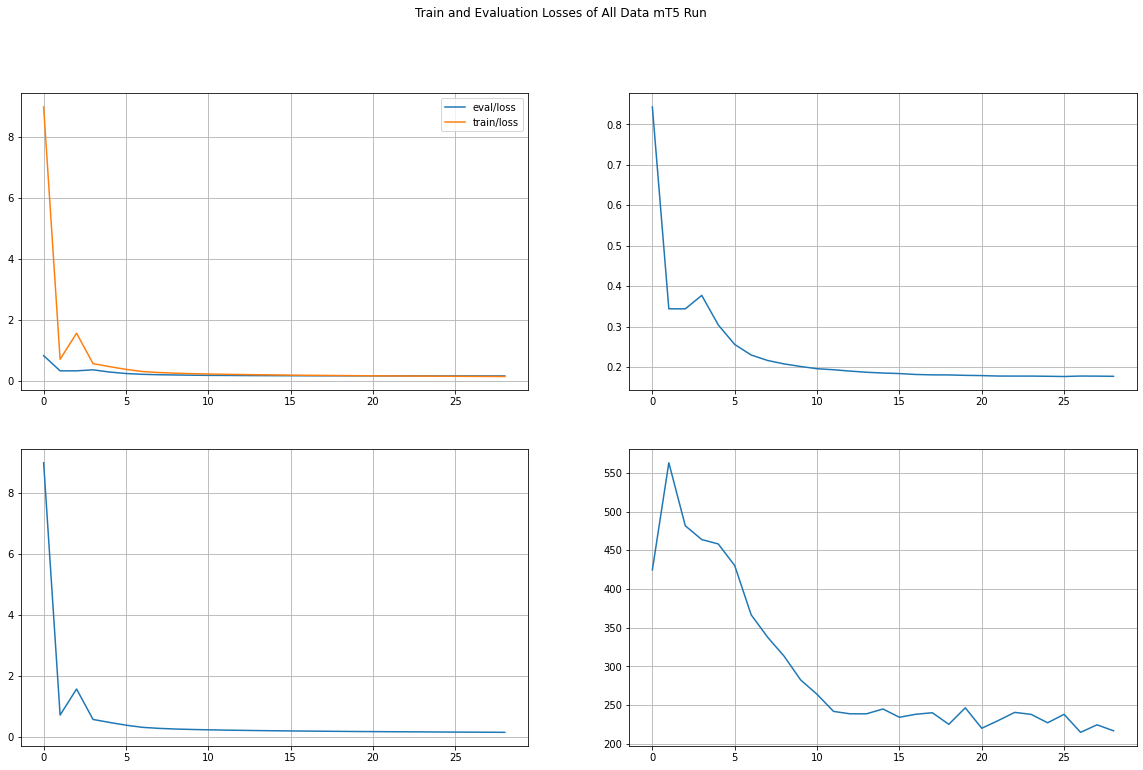

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

previous_mT5.plot( y=["eval/loss", "train/loss"], grid=True, ax=axes[0,0])
#ax.set_title("Title for first plot")
previous_mT5["eval/loss"].plot(grid=True, ax=axes[0,1])
previous_mT5["train/loss"].plot( grid=True, ax=axes[1,0])
previous_mT5["eval/runtime"].plot( grid=True, ax=axes[1,1])
plt.suptitle('Train and Evaluation Losses of All Data mT5 Run')

##### Test results check

In [ ]:
import json
import pandas as pd
data = json.load(open('/content/drive/MyDrive/MscThesis/Logging_TestSet_Results/SportV2_run/SportV2_first_fully_finetuned_logResults.json'))

In [ ]:
Sport_first_data = json.load(open('/content/drive/MyDrive/MscThesis/Logging_TestSet_Results/SportV2_run/SportV2_first_fully_finetuned_logResults.json'))
Stock_first_data = json.load(open('/content/drive/MyDrive/MscThesis/Logging_TestSet_Results/Stock_run/Stock_first_fully_finetuned_logResults.json'))
Previous_mT5_data = json.load(open('/content/drive/MyDrive/MscThesis/Logging_TestSet_Results/Previous/Previous_mT5.json'))


In [ ]:
BartScore_Dfs = pd.DataFrame()
BartScore_Dfs['All data mT5 BartScores'] = Previous_mT5_data['bart_scores_output']
BartScore_Dfs['SportV2 First mT5 BartScores'] = Sport_first_data['bart_scores_output']
BartScore_Dfs['Stock First mT5 BartScores'] = Stock_first_data['bart_scores_output']

In [ ]:
BartScore_Dfs.describe()

All data mT5 BartScores  SportV2 First mT5 BartScores  \
count              3028.000000                   3028.000000   
mean                 -3.300421                     -3.580253   
std                   1.674621                      1.705093   
min                 -11.965081                    -11.967161   
25%                  -4.383607                     -4.571274   
50%                  -3.392477                     -3.611238   
75%                  -2.381185                     -2.596680   
max                  -0.000004                     -0.000005   

       Stock First mT5 BartScores  
count                 3028.000000  
mean                    -3.716385  
std                      1.672658  
min                    -12.374957  
25%                     -4.620527  
50%                     -3.640636  
75%                     -2.729597  
max                     -0.000005

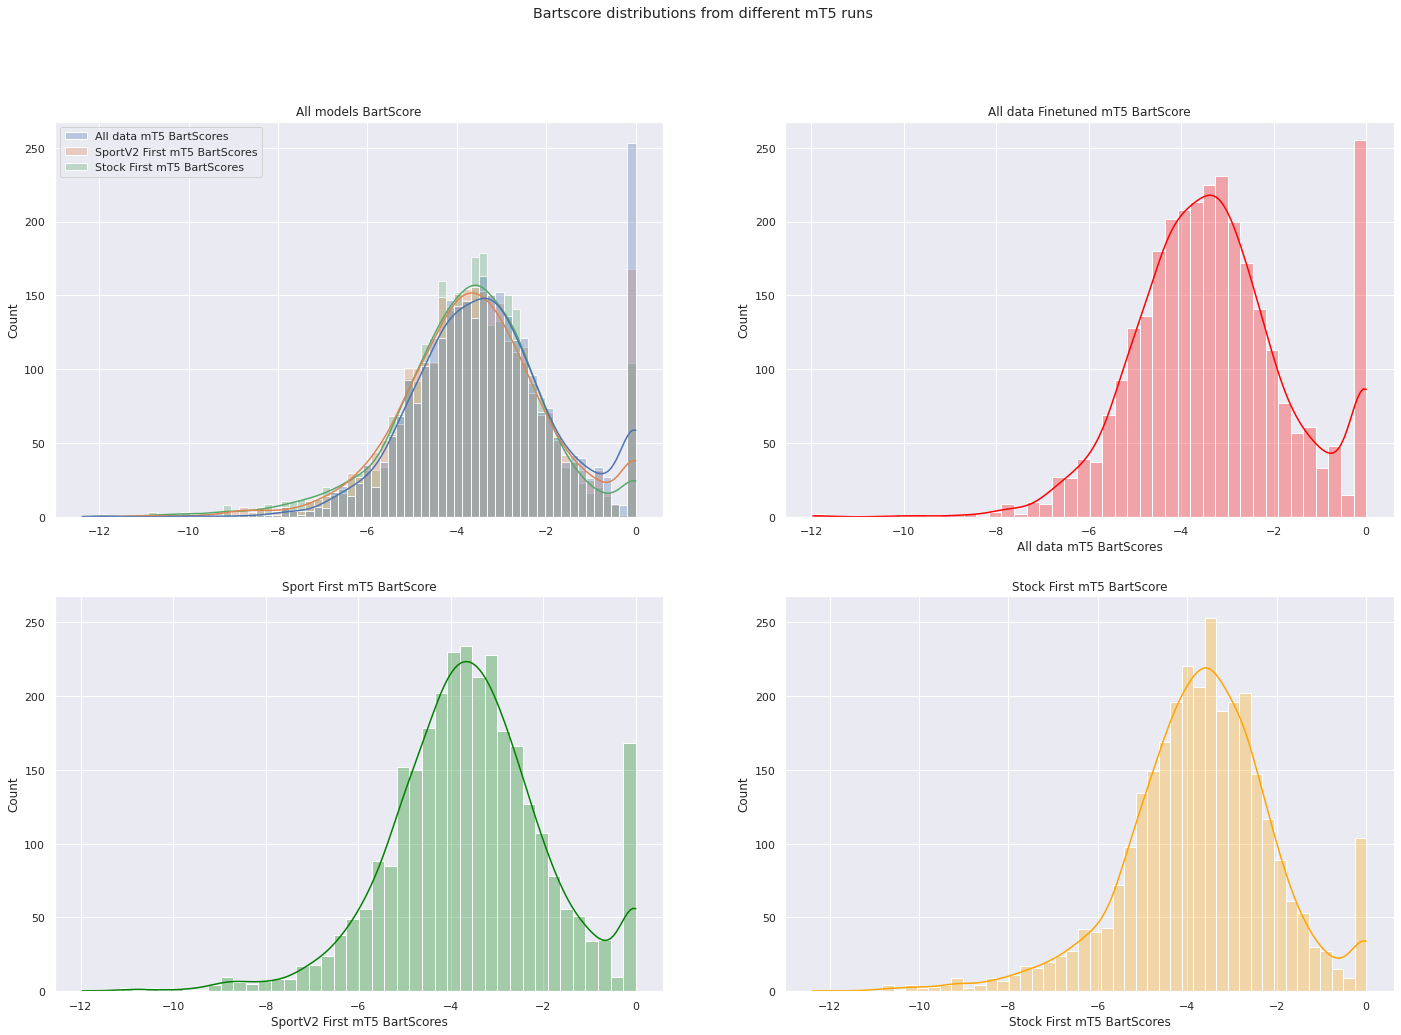

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(24, 16))
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# plt.rcParams["figure.figsize"] = (24,16)

sns.histplot(data=BartScore_Dfs, color="skyblue",  kde=True, alpha=0.3, ax=axs[0, 0]).set_title('All models BartScore')
sns.histplot(data=BartScore_Dfs["All data mT5 BartScores"], color="red", kde=True, alpha=0.3, ax=axs[0, 1]).set_title('All data Finetuned mT5 BartScore')
sns.histplot(data=BartScore_Dfs["SportV2 First mT5 BartScores"], color="green",  kde=True, alpha=0.3, ax=axs[1, 0]).set_title('Sport First mT5 BartScore')
sns.histplot(data=BartScore_Dfs["Stock First mT5 BartScores"], color="orange", kde=True, alpha=0.3, ax=axs[1, 1]).set_title('Stock First mT5 BartScore')

plt.setp(axs, ylim=axs[0,1].get_ylim())
plt.suptitle('Bartscore distributions from different mT5 runs')
plt.show()

Text(0.5, 0, 'Total value')

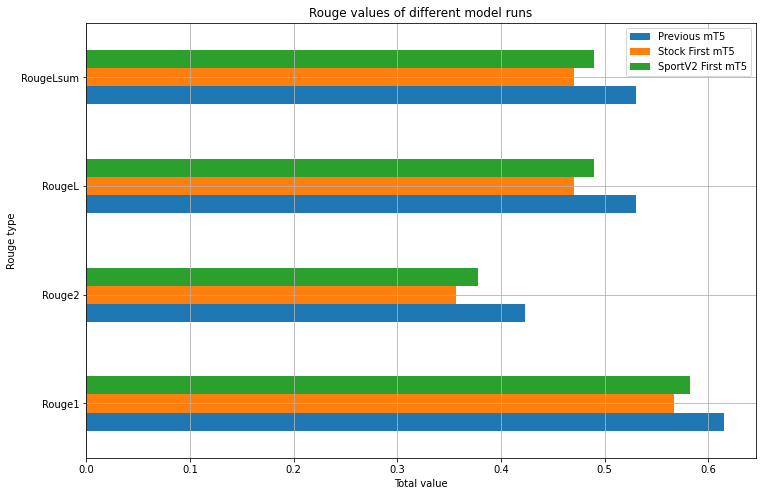

In [ ]:
plotdata = pd.DataFrame({
    
"Previous mT5":[ Previous_mT5_data["rouge_output"]['rouge1'], Previous_mT5_data["rouge_output"]['rouge2'], Previous_mT5_data["rouge_output"]['rougeL'], Previous_mT5_data["rouge_output"]['rougeLsum']],
"Stock First mT5":[ Stock_first_data["rouge_output"]['rouge1'], Stock_first_data["rouge_output"]['rouge2'], Stock_first_data["rouge_output"]['rougeL'], Stock_first_data["rouge_output"]['rougeLsum']],
"SportV2 First mT5":[ Sport_first_data["rouge_output"]['rouge1'], Sport_first_data["rouge_output"]['rouge2'], Sport_first_data["rouge_output"]['rougeL'], Sport_first_data["rouge_output"]['rougeLsum']]
                
}, 
index=[ "Rouge1", "Rouge2", "RougeL", "RougeLsum"]
)
plotdata.plot(kind="barh", figsize=(12,8), grid=True)
#plotdata.figure(figsize=(24,16))
plt.title("Rouge values of different model runs")
plt.ylabel("Rouge type")
plt.xlabel("Total value")

Text(0.5, 0, 'Total Value')

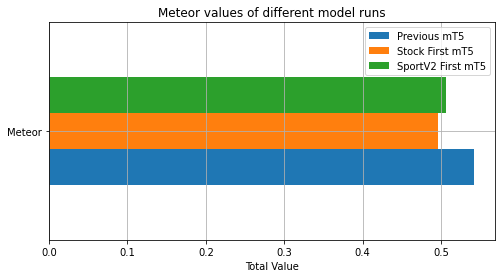

In [ ]:
plotdata = pd.DataFrame({
    
"Previous mT5":[ Previous_mT5_data["perp_output"]["meteor"]],
"Stock First mT5":[ Stock_first_data["meteor_results"]["meteor"]],
"SportV2 First mT5":[ Sport_first_data["meteor_results"]["meteor"]]
                
}, 
index=[ "Meteor"]
)
plotdata.plot(kind="barh", figsize=(8,4), grid=True)
#plotdata.figure(figsize=(24,16))
plt.title("Meteor values of different model runs")
#plt.ylabel("Error type")
plt.xlabel("Total Value")

### Language splits

2 - 1567 is english
1568 + is dutch

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

#### Base model

In [ ]:
base_data = json.load(open('/content/drive/MyDrive/MscThesis/Language Splits Json/google_mt5-base_logResults.json'))

In [ ]:
English_Base = base_data['bart_scores_output'][:1565]
Dutch_Base = base_data['bart_scores_output'][1565:]

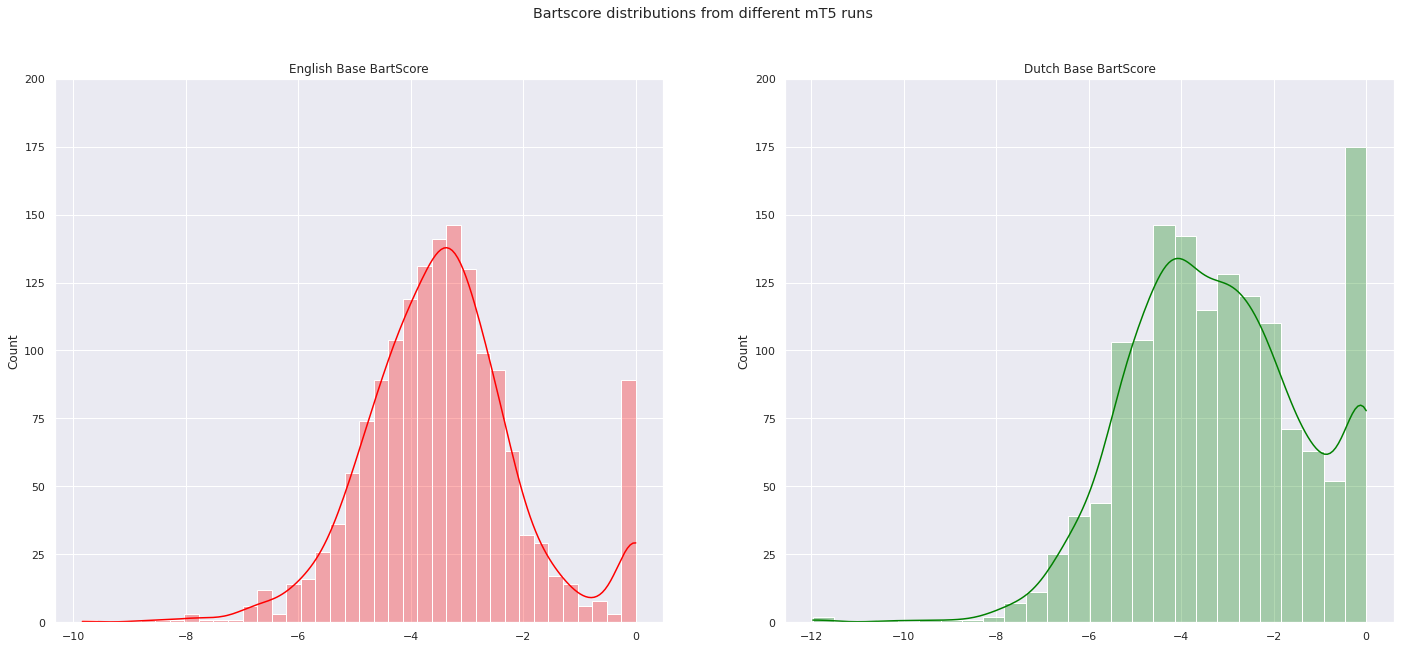

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24, 10))
# custom_ylim = (0, 200)
sns.histplot(data=English_Base, color="red", kde=True, ax=ax1, alpha=0.3).set_title('English Base BartScore')
sns.histplot(data=Dutch_Base, color="green",  kde=True, ax=ax2, alpha=0.3).set_title('Dutch Base BartScore')

custom_ylim = (0, 200)
plt.setp(ax1, ylim=custom_ylim)
plt.setp(ax2, ylim=custom_ylim)
plt.suptitle('Bartscore distributions from different mT5 runs')
plt.show()


#### Augmented Model

In [ ]:
Aug_data = json.load(open('/content/drive/MyDrive/MscThesis/Language Splits Json/google_mt5-base_augmented_logResultsTestSet.json'))

In [ ]:
English_Aug = Aug_data['bart_scores_output'][:1565]
Dutch_Aug = Aug_data['bart_scores_output'][1565:]

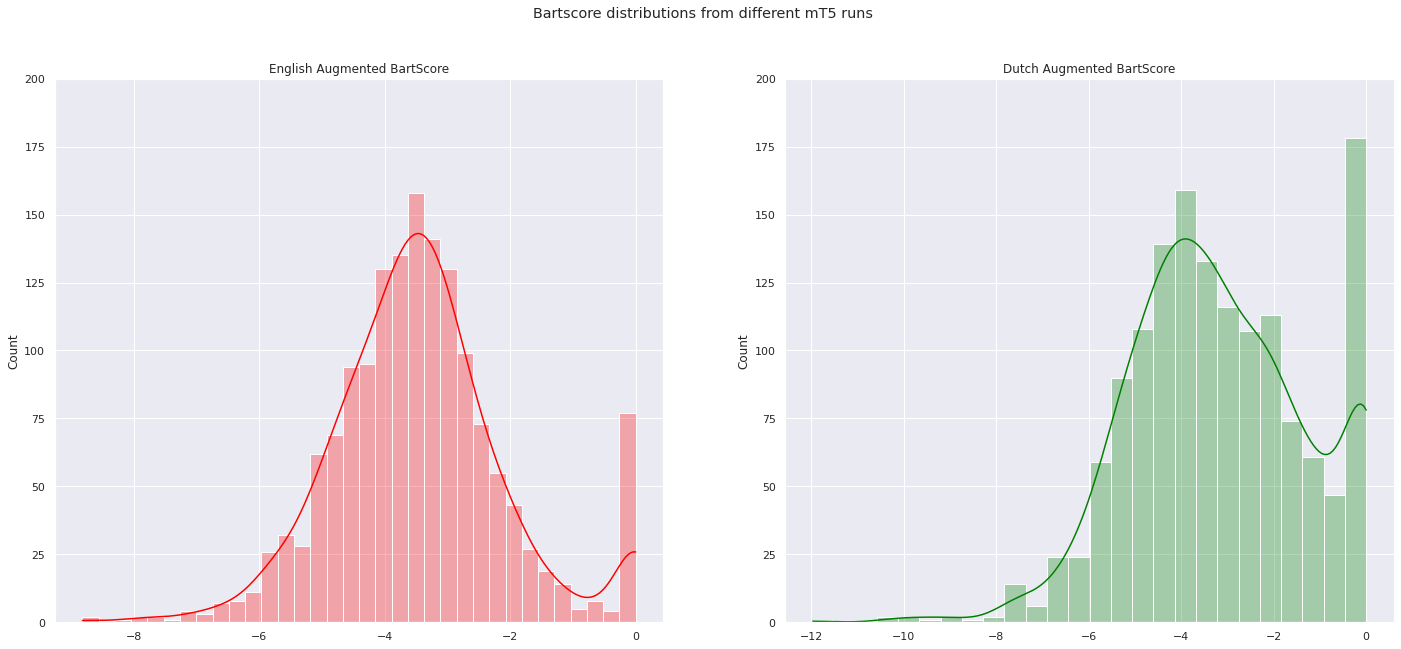

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24, 10))

sns.histplot(data=English_Aug, color="red", kde=True, ax=ax1, alpha=0.3).set_title('English Augmented BartScore')
sns.histplot(data=Dutch_Aug, color="green",  kde=True, ax=ax2, alpha=0.3).set_title('Dutch Augmented BartScore')

custom_ylim = (0, 200)
plt.setp(ax1, ylim=custom_ylim)
plt.setp(ax2, ylim=custom_ylim)
plt.suptitle('Bartscore distributions from different mT5 runs')
plt.show()

#### Elongated Model

In [ ]:
Elon_data = json.load(open('/content/drive/MyDrive/MscThesis/Language Splits Json/elongated_google_mt5-base_test_logResults.json'))

In [ ]:
English_Elon = Elon_data['bart_scores_output'][:1565]
Dutch_Elon = Elon_data['bart_scores_output'][1565:]

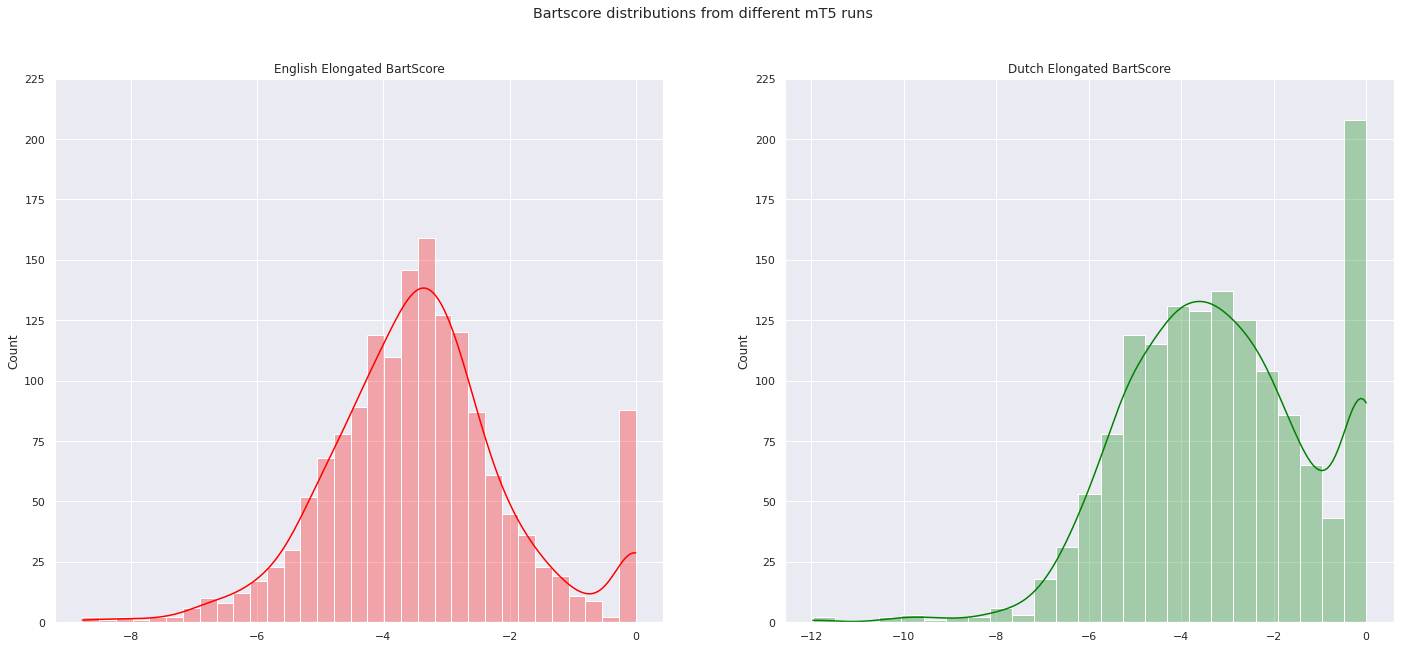

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24, 10))

sns.histplot(data=English_Elon, color="red", kde=True, ax=ax1, alpha=0.3).set_title('English Elongated BartScore')
sns.histplot(data=Dutch_Elon, color="green",  kde=True, ax=ax2, alpha=0.3).set_title('Dutch Elongated BartScore')

custom_ylim = (0, 225)
plt.setp(ax1, ylim=custom_ylim)
plt.setp(ax2, ylim=custom_ylim)
plt.suptitle('Bartscore distributions from different mT5 runs')
plt.show()

#### overlapping test

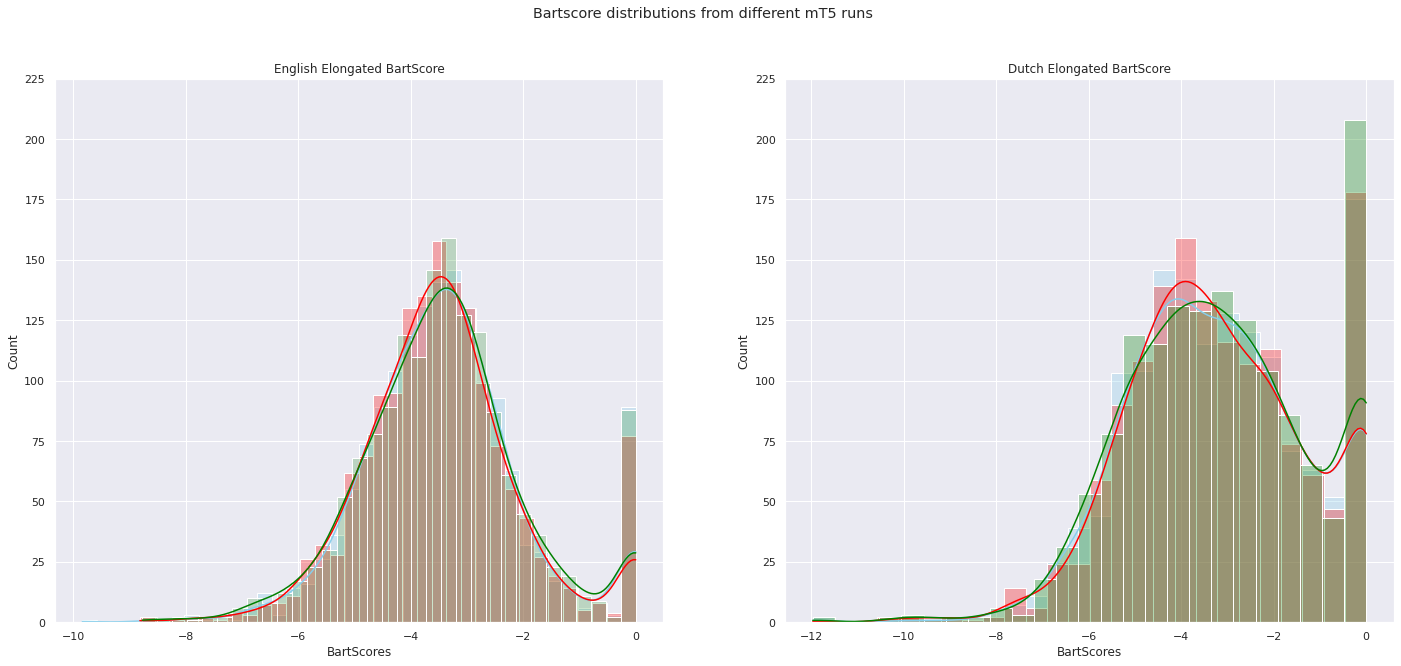

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24, 10))

sns.histplot(data=English_Base, color="skyblue", kde=True, ax=ax1, alpha=0.3).set_title('English Base BartScore')
sns.histplot(data=English_Aug, color="red", kde=True, ax=ax1, alpha=0.3).set_title('English Augmented BartScore')
sns.histplot(data=English_Elon, color="green", kde=True, ax=ax1, alpha=0.2).set_title('English Elongated BartScore')

sns.histplot(data=Dutch_Base, color="skyblue",  kde=True, ax=ax2, alpha=0.3).set_title('Dutch Base BartScore')
sns.histplot(data=Dutch_Aug, color="red",  kde=True, ax=ax2, alpha=0.3).set_title('Dutch Augmented BartScore')
sns.histplot(data=Dutch_Elon, color="green",  kde=True, ax=ax2, alpha=0.3).set_title('Dutch Elongated BartScore')

custom_ylim = (0, 225)
plt.setp(ax1, ylim=custom_ylim)
plt.setp(ax2, ylim=custom_ylim)
ax1.set(xlabel='BartScores', ylabel='Count')
ax2.set(xlabel='BartScores', ylabel='Count')
plt.suptitle('Bartscore distributions from different mT5 runs')
plt.show()


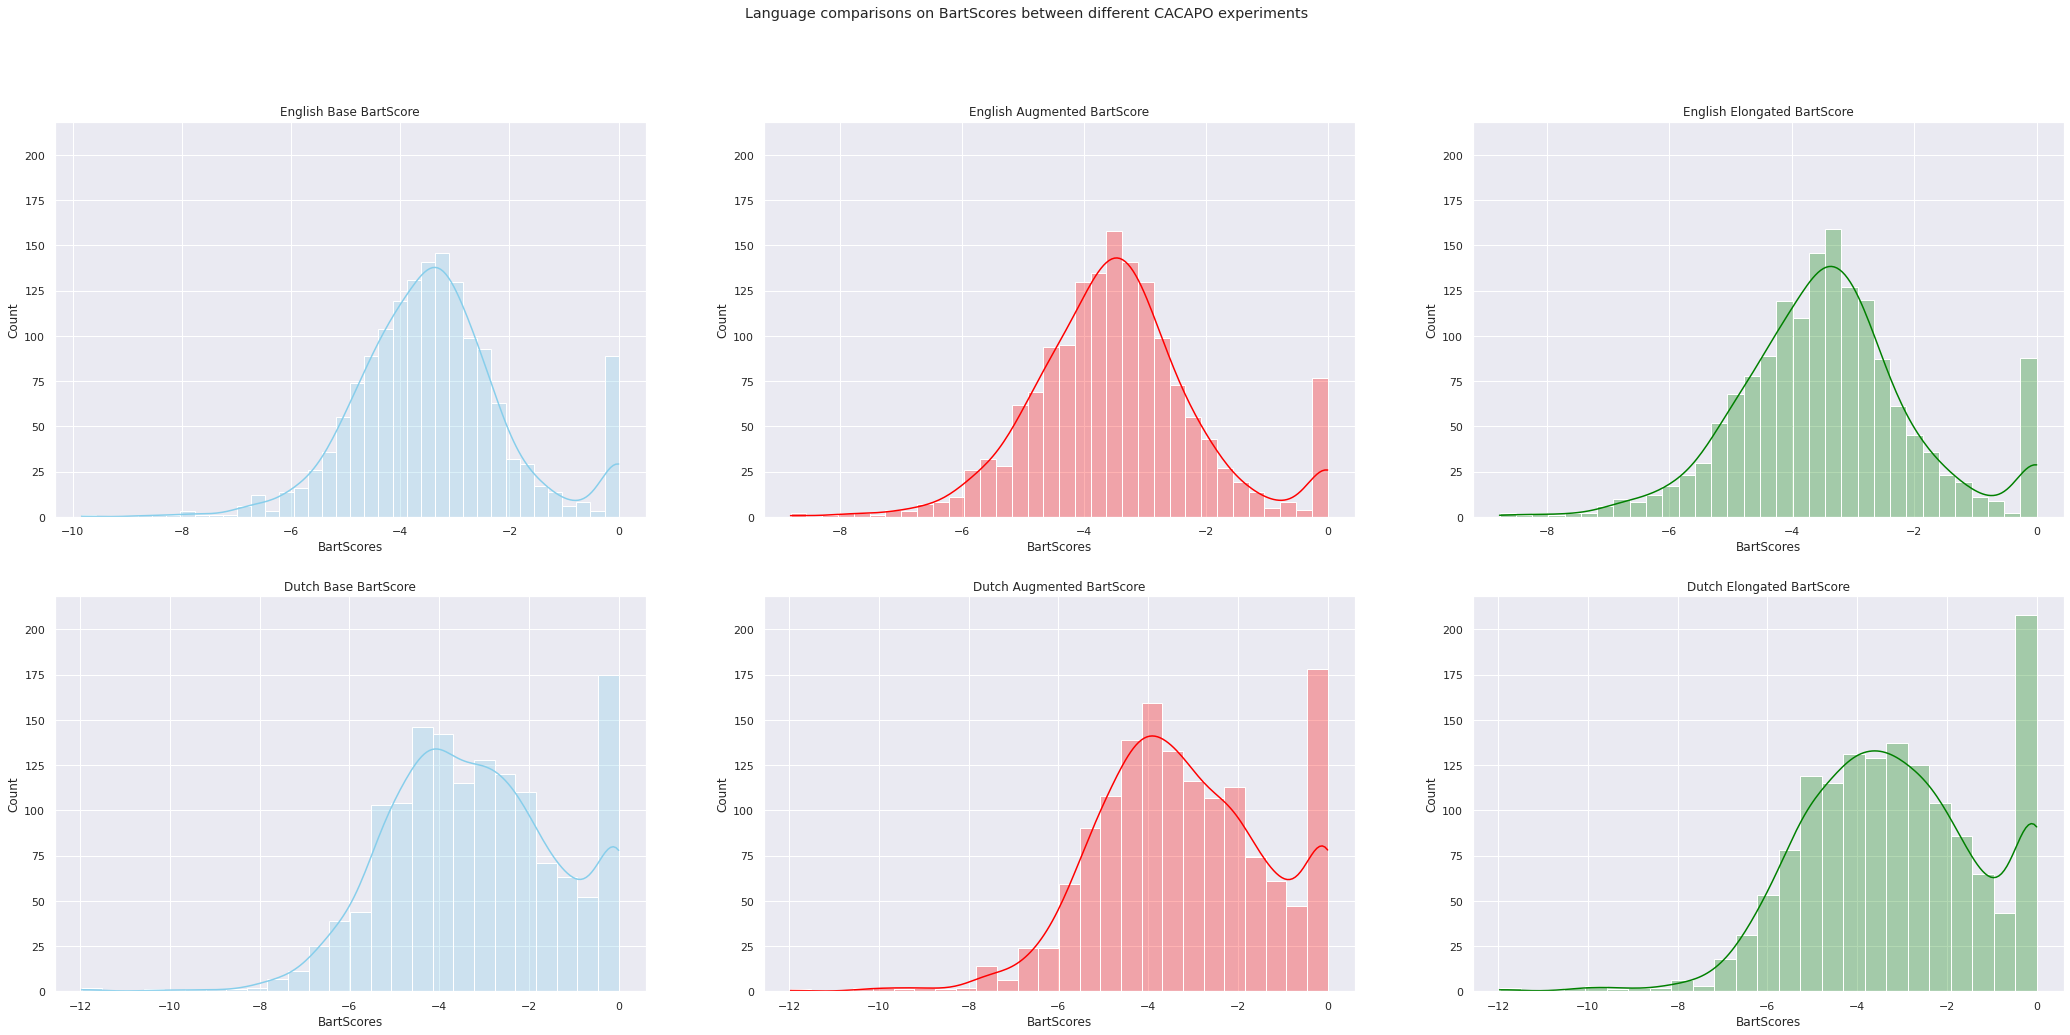

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(36, 16))


sns.histplot(data=English_Base, color="skyblue",  kde=True, alpha=0.3, ax=axs[0, 0]).set_title('English Base BartScore')
sns.histplot(data=English_Aug, color="red", kde=True, alpha=0.3, ax=axs[0, 1]).set_title('English Augmented BartScore')
sns.histplot(data=English_Elon, color="green",  kde=True, alpha=0.3, ax=axs[0, 2]).set_title('English Elongated BartScore')
sns.histplot(data=Dutch_Base, color="skyblue", kde=True, alpha=0.3, ax=axs[1, 0]).set_title('Dutch Base BartScore')
sns.histplot(data=Dutch_Aug, color="red", kde=True, alpha=0.3, ax=axs[1, 1]).set_title('Dutch Augmented BartScore')
sns.histplot(data=Dutch_Elon, color="green", kde=True, alpha=0.3, ax=axs[1, 2]).set_title('Dutch Elongated BartScore')

axs[0, 0].set(xlabel='BartScores', ylabel='Count')
axs[0, 1].set(xlabel='BartScores', ylabel='Count')
axs[0, 2].set(xlabel='BartScores', ylabel='Count')
axs[1, 0].set(xlabel='BartScores', ylabel='Count')
axs[1, 1].set(xlabel='BartScores', ylabel='Count')
axs[1, 2].set(xlabel='BartScores', ylabel='Count')


plt.setp(axs, ylim=axs[1,2].get_ylim())
plt.suptitle('Language comparisons on BartScores between different CACAPO experiments')
plt.show()

#### Perplexity

In [ ]:
Eng_base_perplexity = base_data['meteor_results']['perplexities'][:1565]
NL_base_perplexity = base_data['meteor_results']['perplexities'][1565:]


Eng_Augmented_perplexity = Aug_data['perp_output']['perplexities'][:1565]
NL_Augmented_perplexity = Aug_data['perp_output']['perplexities'][1565:]


Eng_Elon_perp = Elon_data['perp_output']['perplexities'][:1565]
NL_Elon_perp = Elon_data['perp_output']['perplexities'][1565:]

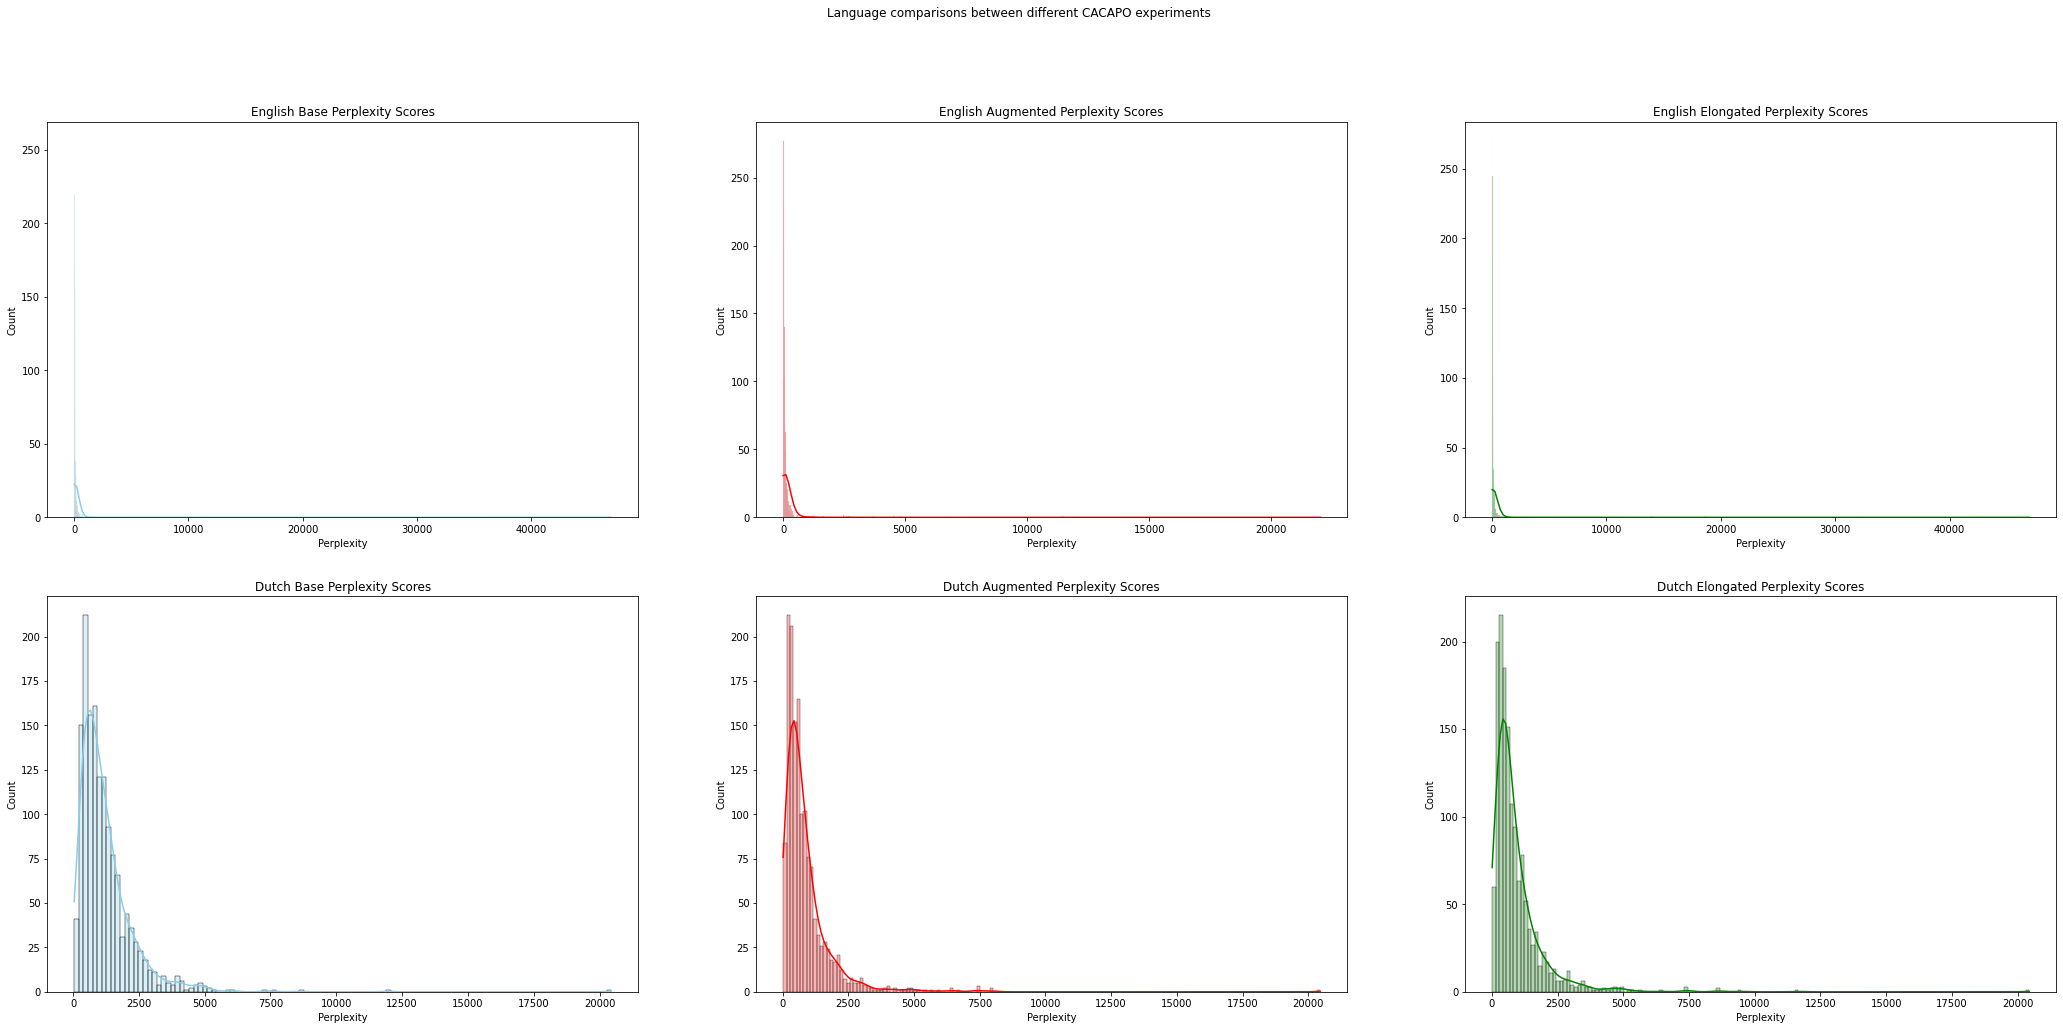

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(36, 16))


sns.histplot(data=Eng_base_perplexity, color="skyblue",  kde=True, alpha=0.3, ax=axs[0, 0]).set_title('English Base Perplexity Scores')
sns.histplot(data=Eng_Augmented_perplexity, color="red", kde=True, alpha=0.3, ax=axs[0, 1]).set_title('English Augmented Perplexity Scores')
sns.histplot(data=Eng_Elon_perp, color="green",  kde=True, alpha=0.3, ax=axs[0, 2]).set_title('English Elongated Perplexity Scores')
sns.histplot(data=NL_base_perplexity, color="skyblue", kde=True, alpha=0.3, ax=axs[1, 0]).set_title('Dutch Base Perplexity Scores')
sns.histplot(data=NL_Augmented_perplexity, color="red", kde=True, alpha=0.3, ax=axs[1, 1]).set_title('Dutch Augmented Perplexity Scores')
sns.histplot(data=NL_Elon_perp, color="green", kde=True, alpha=0.3, ax=axs[1, 2]).set_title('Dutch Elongated Perplexity Scores')

axs[0, 0].set(xlabel='Perplexity', ylabel='Count')
axs[0, 1].set(xlabel='Perplexity', ylabel='Count')
axs[0, 2].set(xlabel='Perplexity', ylabel='Count')
axs[1, 0].set(xlabel='Perplexity', ylabel='Count')
axs[1, 1].set(xlabel='Perplexity', ylabel='Count')
axs[1, 2].set(xlabel='Perplexity', ylabel='Count')

plt.suptitle('Language comparisons on Perplexity between different CACAPO experiments')
plt.show()

#### BertScores

In [ ]:
Eng_base_bertScores = base_data['bertscore_output']['f1'][:1565]
NL_base_bertScores = base_data['bertscore_output']['f1'][1565:]


Eng_Augmented_bertScores = Aug_data['bertscore_output']['f1'][:1565]
NL_Augmented_bertScores = Aug_data['bertscore_output']['f1'][1565:]


Eng_Elon_bertScores = Elon_data['bertscore_output']['f1'][:1565]
NL_Elon_bertScores = Elon_data['bertscore_output']['f1'][1565:]

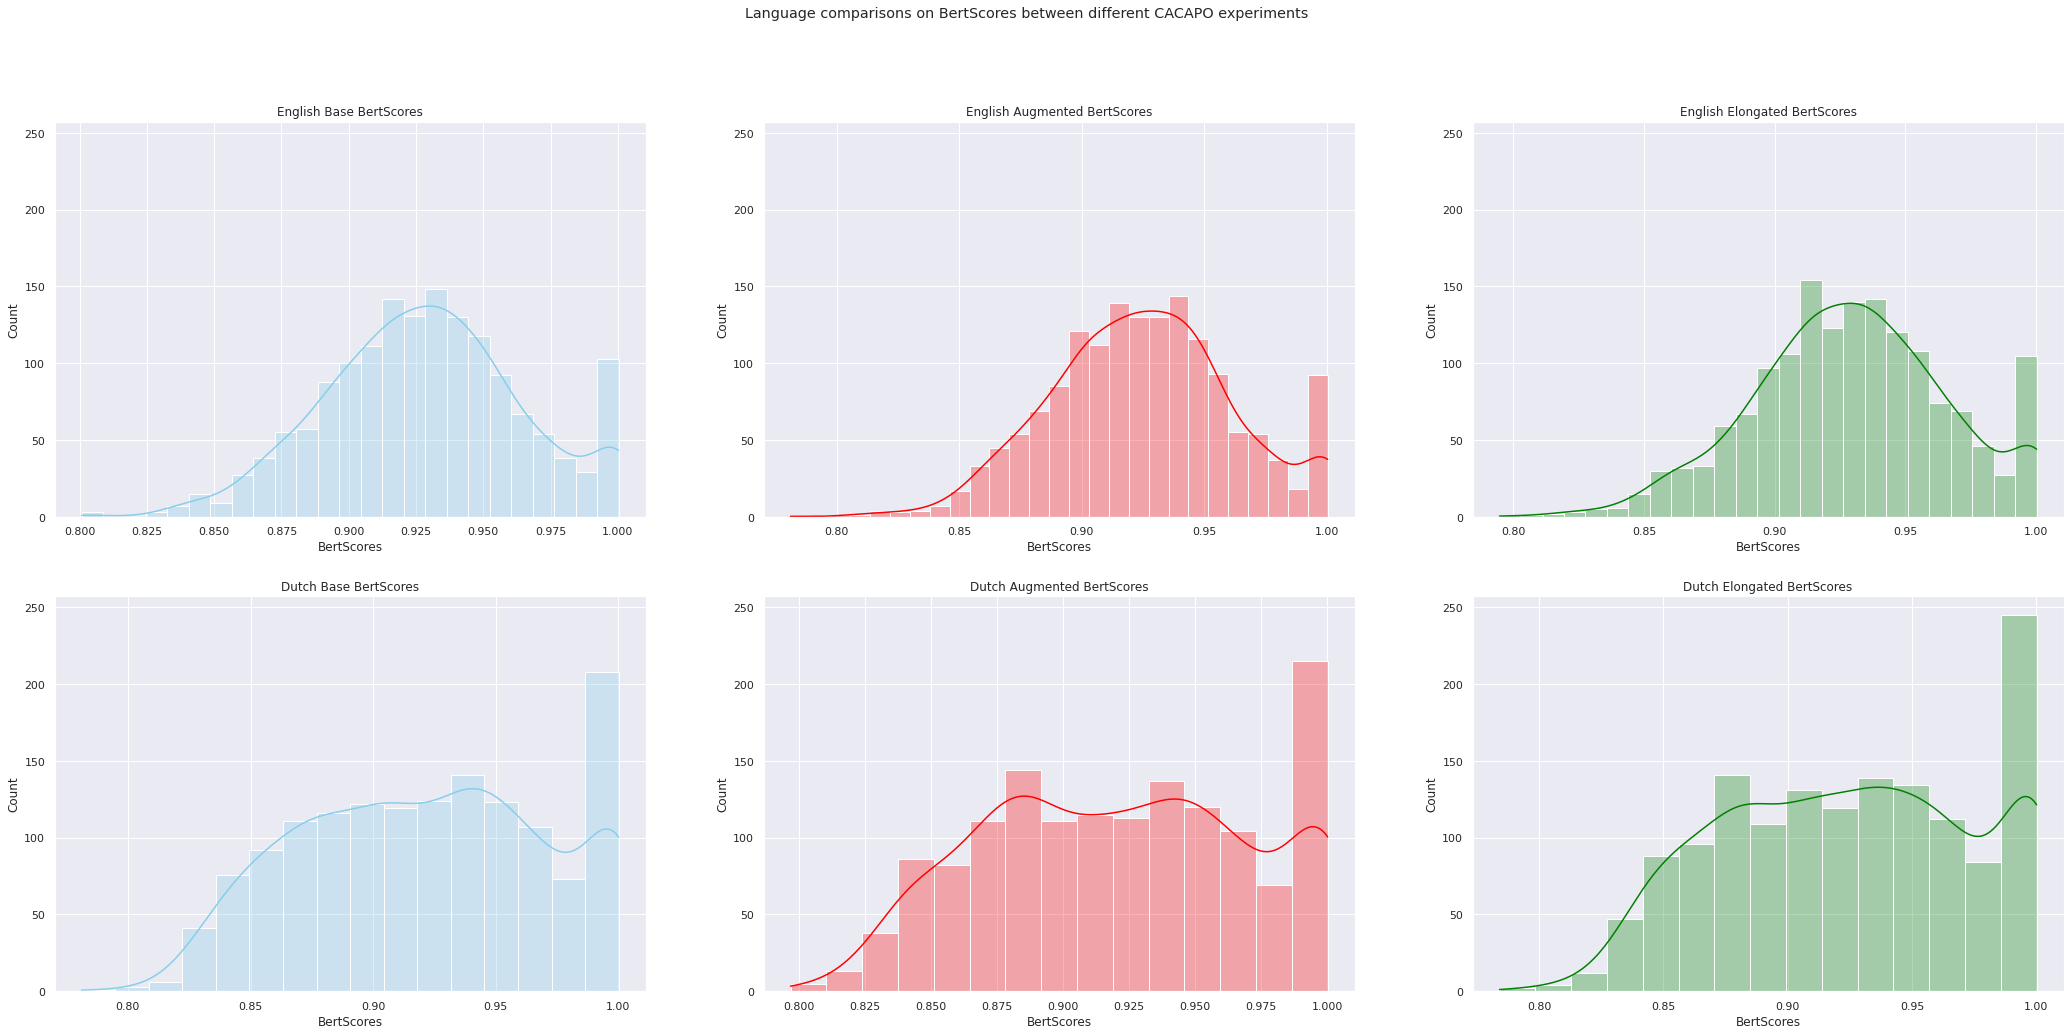

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(36, 16))


sns.histplot(data=Eng_base_bertScores, color="skyblue",  kde=True, alpha=0.3, ax=axs[0, 0]).set_title('English Base BertScores')
sns.histplot(data=Eng_Augmented_bertScores, color="red", kde=True, alpha=0.3, ax=axs[0, 1]).set_title('English Augmented BertScores')
sns.histplot(data=Eng_Elon_bertScores, color="green",  kde=True, alpha=0.3, ax=axs[0, 2]).set_title('English Elongated BertScores')
sns.histplot(data=NL_base_bertScores, color="skyblue", kde=True, alpha=0.3, ax=axs[1, 0]).set_title('Dutch Base BertScores')
sns.histplot(data=NL_Augmented_bertScores, color="red", kde=True, alpha=0.3, ax=axs[1, 1]).set_title('Dutch Augmented BertScores')
sns.histplot(data=NL_Elon_bertScores, color="green", kde=True, alpha=0.3, ax=axs[1, 2]).set_title('Dutch Elongated BertScores')

axs[0, 0].set(xlabel='BertScores', ylabel='Count')
axs[0, 1].set(xlabel='BertScores', ylabel='Count')
axs[0, 2].set(xlabel='BertScores', ylabel='Count')
axs[1, 0].set(xlabel='BertScores', ylabel='Count')
axs[1, 1].set(xlabel='BertScores', ylabel='Count')
axs[1, 2].set(xlabel='BertScores', ylabel='Count')


plt.setp(axs, ylim=axs[1,2].get_ylim())
plt.suptitle('Language comparisons on BertScores between different CACAPO experiments')
plt.show()

## All bartscores for different experiments

In [ ]:
Elon_data = json.load(open('/content/drive/MyDrive/MscThesis/Logging_TestSet_Results/Elongated/google_mt5-base_logResults.json'))
Aug_data = json.load(open('/content/drive/MyDrive/MscThesis/Logging_TestSet_Results/Augmented/google_mt5-base_augmented_logResults.json'))
base_data = json.load(open('/content/drive/MyDrive/MscThesis/Language Splits Json/google_mt5-base_logResults.json'))

In [ ]:
base_data.keys()

dict_keys(['blue_output', 'rouge_output', 'meteor_results', 'perp_output', 'bertscore_output', 'bart_scores_output'])

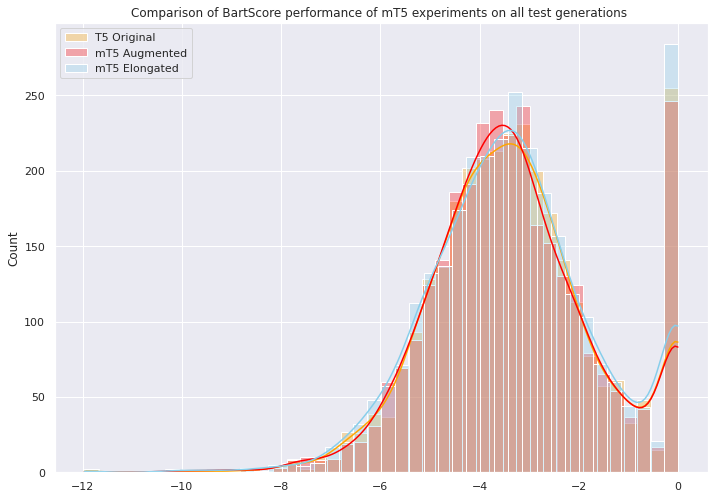

In [ ]:
# libraries & dataset

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.histplot(data=base_data["bart_scores_output"], color="orange", label="T5 Original", kde=True, alpha=0.3)
sns.histplot(data=Aug_data["bart_scores_output"], color="red", label="mT5 Augmented", kde=True, alpha=0.3)
sns.histplot(data=Elon_data["bart_scores_output"], color="skyblue", label="mT5 Elongated", kde=True, alpha=0.3)


plt.legend()
plt.title("Comparison of BartScore performance of mT5 experiments on all test generations ") 
plt.show()